In [31]:
!pip install squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import squarify

In [41]:
plt.rcParams['figure.figsize'] = (30,10)
dtype={'godiste': int, 'kilometraza': int}
df_import = pd.read_csv('/content/car_data.csv', sep=';', low_memory=False)
df_import.head()

,ime,cijena,stanje,lokacija,proizvodjac,model,godiste,kilometraza,kilovata,kubikaza,...,klima,navigacija,alu_felge,oldtimer,udaren,vrsta_oglasa,datum_objave,broj_pregleda,radnja,datum
0,Toyota Avensis T27 2010 godina,17600,Korišteno,Novo Sarajevo,Toyota,Avensis,2010,133000.0,85.0,2.0,...,1.0,1.0,1.0,NaN,NaN,Prodaja,2022-04-15,22762.0,0.0,2022-04-15
1,Alfa Romeo GT 1.9 JTD 16V,7500,Korišteno,Ilijaš,Alfa Romeo,GT,2004,240000.0,110.0,1.9,...,1.0,NaN,1.0,NaN,NaN,Prodaja,2022-04-15,8377.0,0.0,2022-04-15
2,Scenic grande 7 siceva model 2005,3900,Korišteno,"Sarajevo, Novi Grad",Renault,Grand Scenic,2004,227000.0,77.0,1.9,...,1.0,NaN,NaN,NaN,NaN,Prodaja,2022-04-15,8170.0,0.0,2022-04-15
3,Lancia kappa 2.4 Dizel,1900,Korišteno,Novi Travnik,Lancia,Kappa,2001,417000.0,100.0,2.4,...,1.0,NaN,NaN,NaN,NaN,Prodaja,2016-06-12,7279.0,0.0,2022-04-15
4,BMW E91 320,11500,Korišteno,Livno,BMW,320,2008,270000.0,130.0,2.0,...,1.0,NaN,1.0,NaN,NaN,Prodaja,2017-03-27,8250.0,0.0,2022-04-15


In [42]:
df_import.shape

(278693, 40)

# Clean data

In [49]:
# Delete all records with missing values
df = df_import.dropna(subset=['cijena', 'godiste', 'kilometraza', 'proizvodjac', 'model'])
# Removing outliers
df = df[df.kilometraza < 750000]
df = df[df.cijena < 500000]
df = df[df.godiste > 1959]
df = df[df.godiste < 2024]

# Add days listed column
df['datum_objave'] = pd.to_datetime(df['datum_objave'])
df['datum'] = pd.to_datetime(df['datum'])
df['dana_objavljeno'] = df['datum'] - df['datum_objave'] + dt.timedelta(days=1)
df.shape

(276177, 41)

<a name="table_content"></a>

# Table of contents
1. [Manufacturers](#cars_man)
2. [Models](#cars_mod)
3. [Condition](#condition)
4. [Age](#age)
5. [Mileage](#mileage)
6. [Fuel type](#fuel)

  6.1 [Market share of different types](#diesel_petrol)

7. [Dealerships vs individuals](#dealerships_individuals)

  7.1 [Dealerships chaning mileage?](#dealerships_mileage)
    
  7.2 [Price difference](#price_difference)

	7.3 [Price difference at 10-30k](#price_difference_10_30)

8. [Manufacturers data](#man_data)

	8.1 [Drive a lot?](#drive_a_lot)

	8.2 [Want a cheap car?](#cheap_man)

	8.3 [Want a newer car?](#new_man)

	8.4 [What gets sold fast?](#sold_fast)

	8.5 [What gets sold fast?](#not_sold)

	8.6 [Most viewed](#most_viewed)
    
9. [Age for different manufacturers](#man_age)

10. [Car price depreciation](#car_depreciation)

11. [Avg price over time](#avg_price_over_time)

<a name="cars_man"></a>
# 1 Manufacturers
[Back to table of contents](#table_content)

<Axes: >

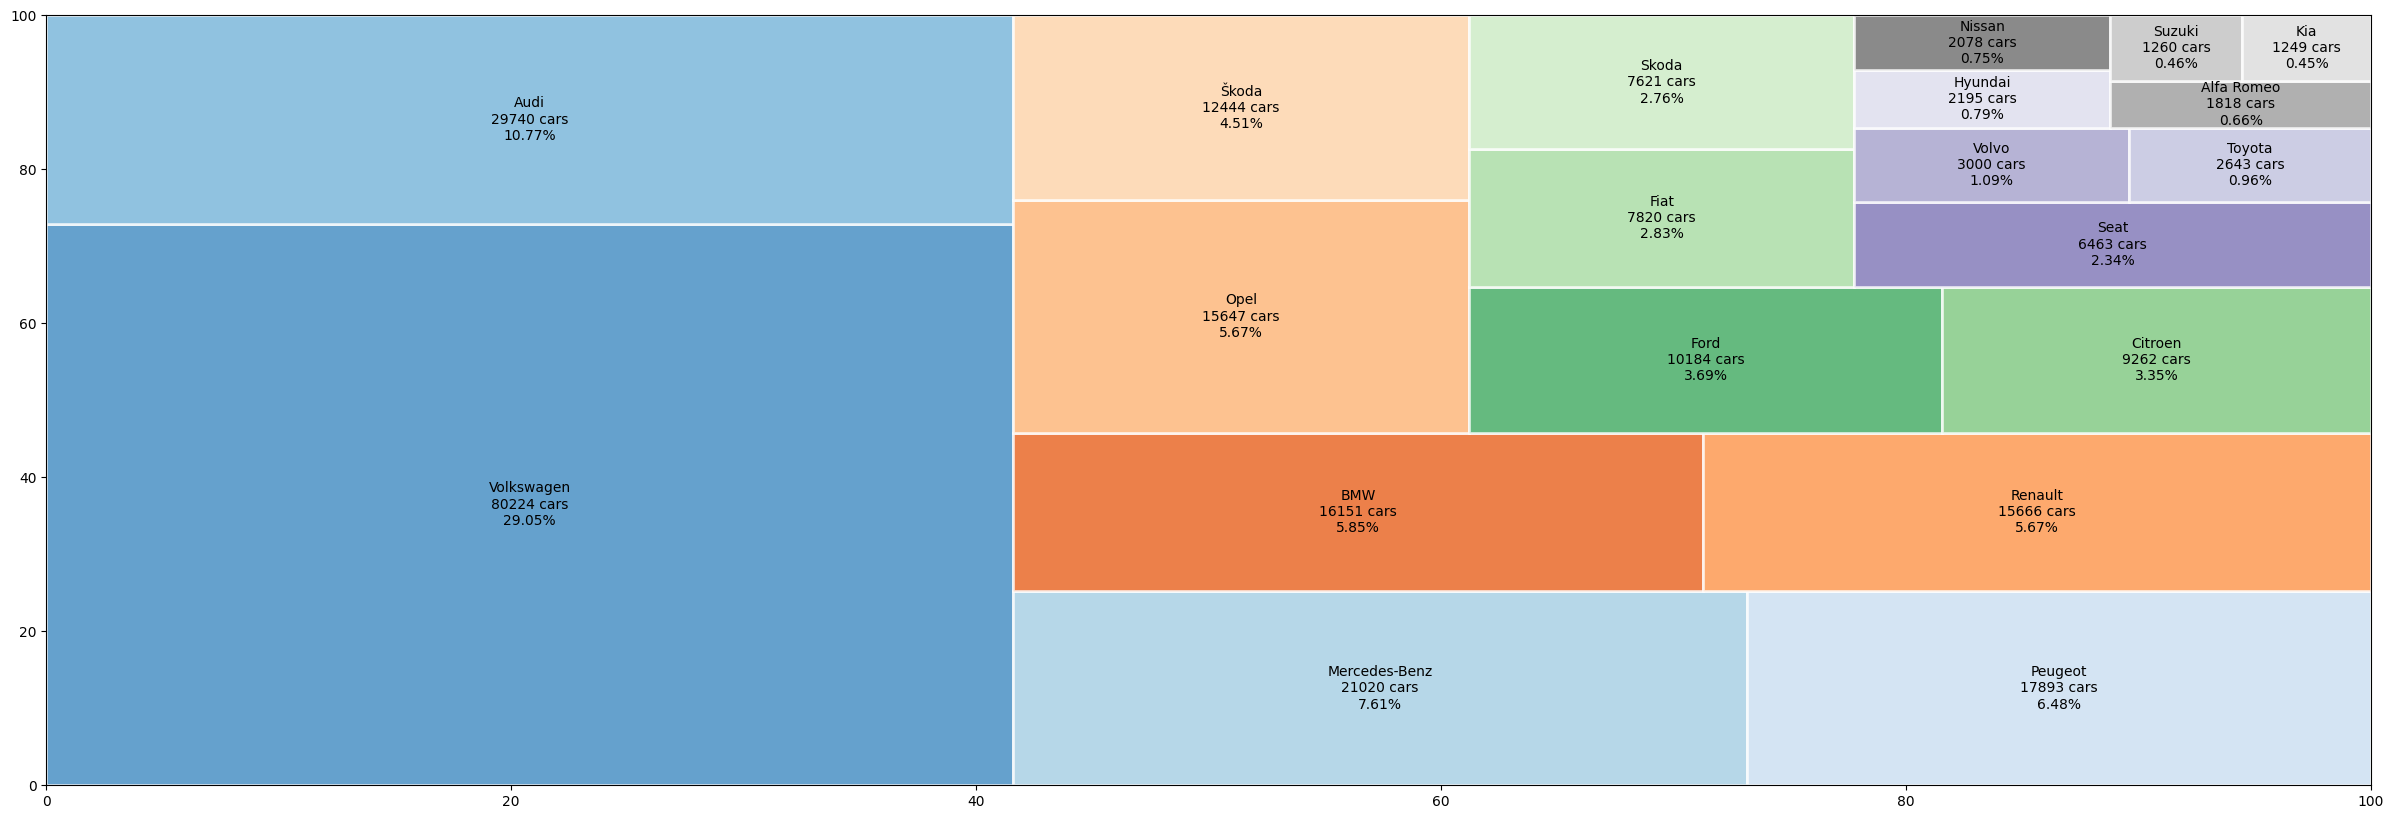

In [54]:
man_count = df.proizvodjac.value_counts()
man_percent = round((man_count/man_count.sum())*100,2)
man_prc = pd.DataFrame({"Cars": man_count, 'Percentage': man_percent})
man_top_20 = man_prc.head(20)
labels = [f"{man}\n{number} cars\n{percentage}%"
          for man, number, percentage in
          list(zip(man_top_20.index, man_top_20.Cars, man_top_20.Percentage))]
squarify.plot(sizes=man_top_20.Percentage,
              label=labels,
              color=plt.cm.tab20c.colors,
              edgecolor="white",
              linewidth=2,
              alpha=0.75)

Compared to Germany: https://www.best-selling-cars.com/germany/2023-full-year-germany-best-selling-car-brands/#:~:text=In%202021%2C%20Volkswagen%2C%20Mercedes-,share%20while%20Ford%20sales%20plummeted.&text=In%20full-year%202021%2C%20Volkswagen,Germany%20and%20increased%20market%20share

<a name="cars_mod"></a>
# 2 Models
[Back to table of contents](#table_content)

<Axes: >

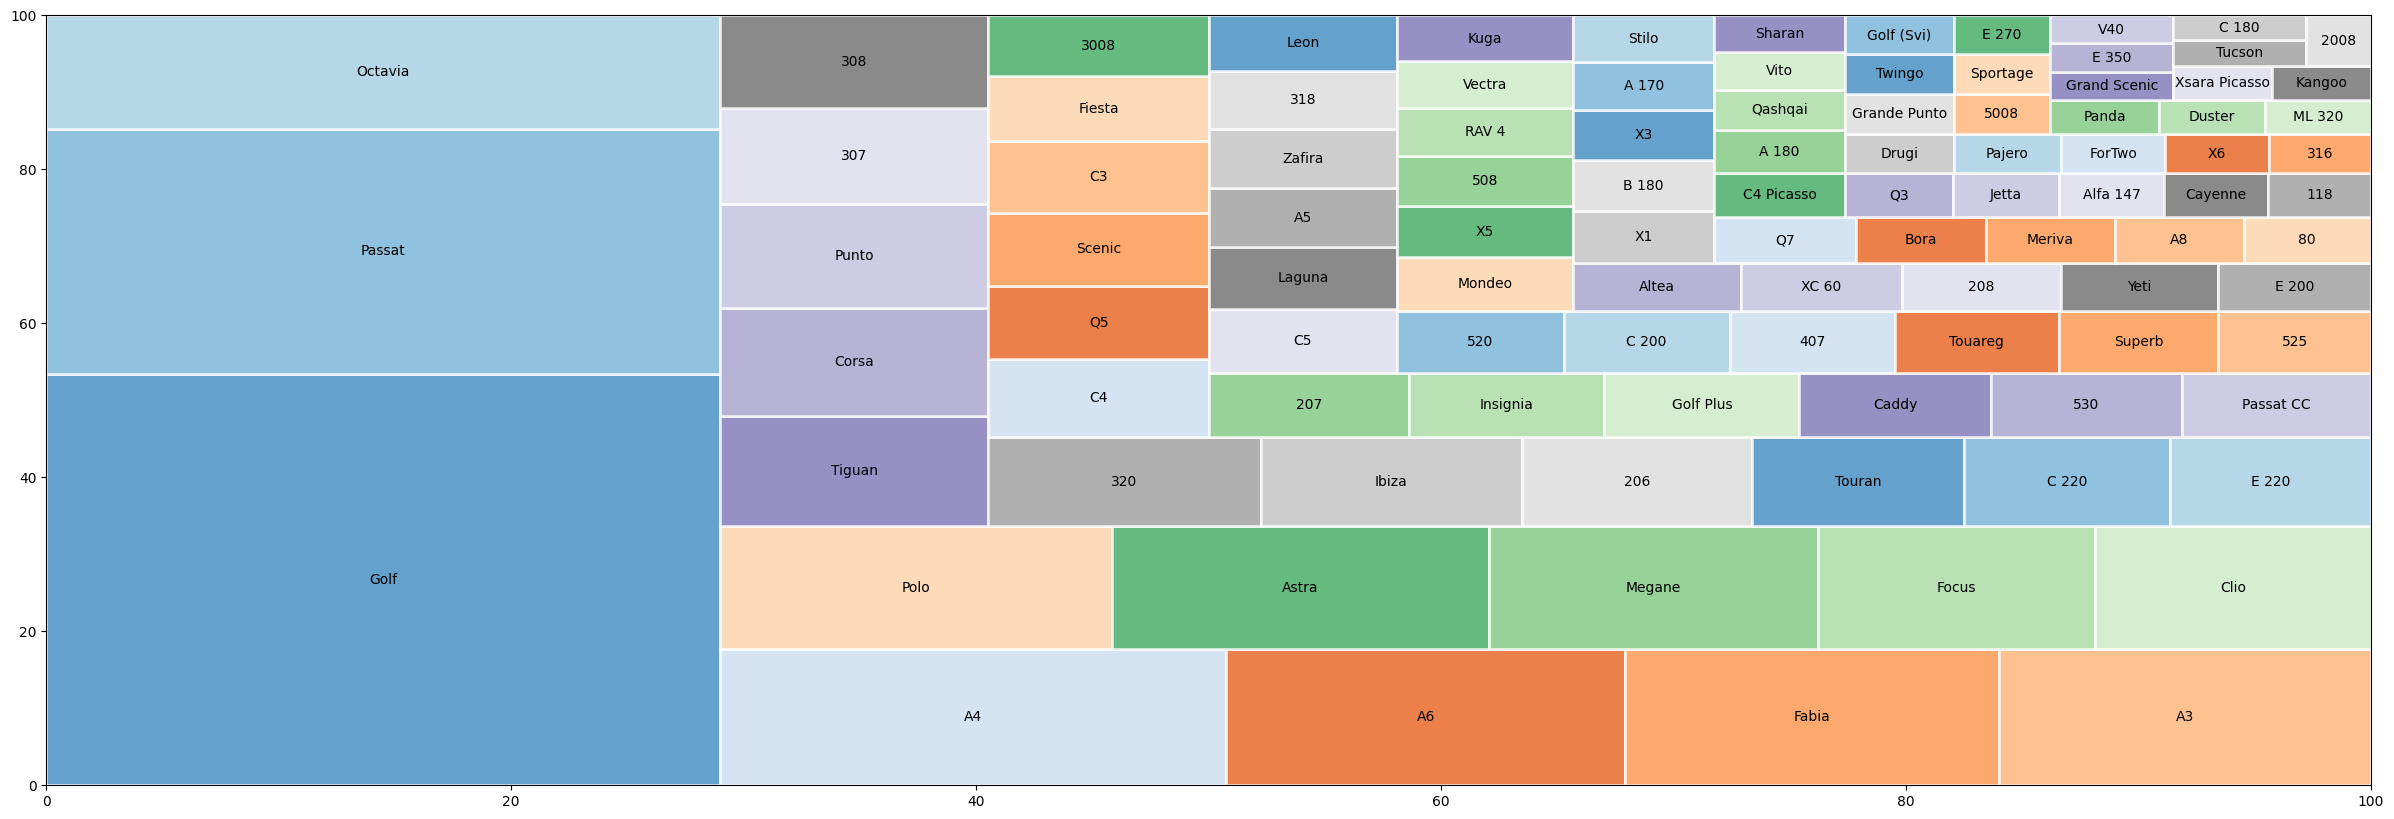

In [57]:
model_count = df.model.value_counts()
model_percentage = round((model_count/model_count.sum())*100,2)
mod_prc = pd.DataFrame({"Cars": model_count, 'Percentage': model_percentage})
mod_top_100 = mod_prc.head(100)
labels = [f"{cars}" for cars in list(mod_top_100.index)]
# ax = fig.add_suplot(111)
squarify.plot(sizes=mod_top_100.Cars,
              label=labels,
              color=plt.cm.tab20c.colors,
              edgecolor="white",
              linewidth=2,
              alpha=0.75)

In [60]:
# List top 100 most common models
mod_top_100

,Cars,Percentage
Golf,34318,12.43
Passat,20414,7.39
Octavia,9456,3.42
A4,8553,3.10
A6,6731,2.44
...,...,...
Xsara Picasso,420,0.15
Kangoo,418,0.15
Tucson,414,0.15
C 180,410,0.15


<a name="condition"></a>
# 3 Condition
[Back to table of contents](#table_content)

koristeno    256897
novo           4494
Name: stanje, dtype: int64
Used cars   256897, 98.28%
New cars      4494,  1.72%


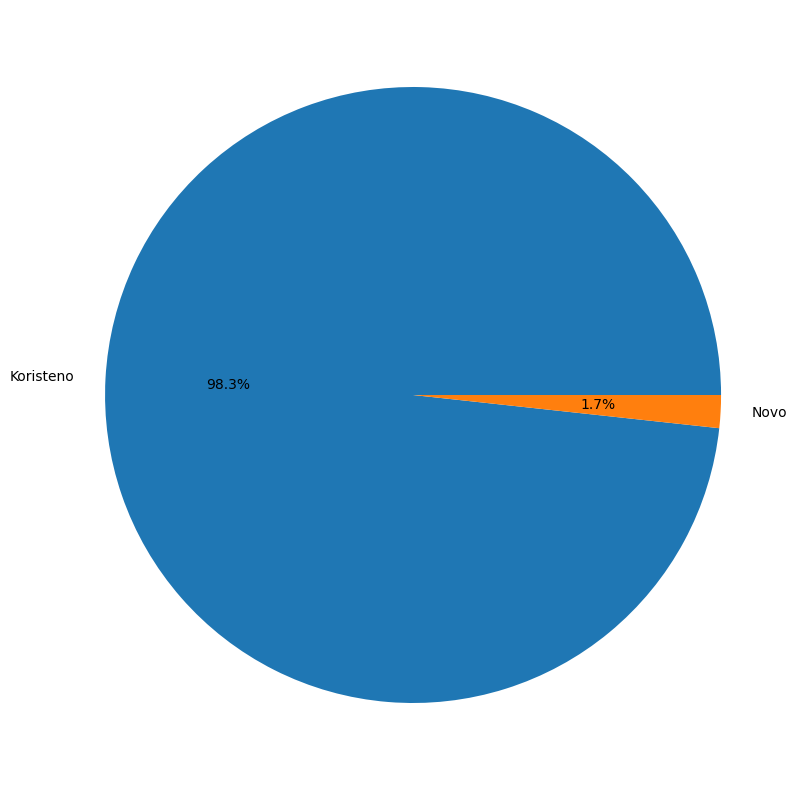

In [75]:
# Clean data
df['stanje'] = df['stanje'].str.lower()
df['stanje'] = df['stanje'].replace({'korišteno': 'koristeno'})

print(df.stanje.value_counts())
used, new = df.stanje.value_counts()
total = used + new


labels = ('Koristeno', 'Novo')
sizes = [used, new]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')


print(f"{'Used cars':<10} {used:>7}, {round(used/total*100,2):>5}%")
print(f"{'New cars':<10} {new:>7}, {round(new/total*100,2):>5}%")

<a name="age"></a>
# 4 Age
[Back to table of contents](#table_content)

<Axes: title={'center': 'Number of cars vs year produced'}, xlabel='Year produced', ylabel='Number of cars'>

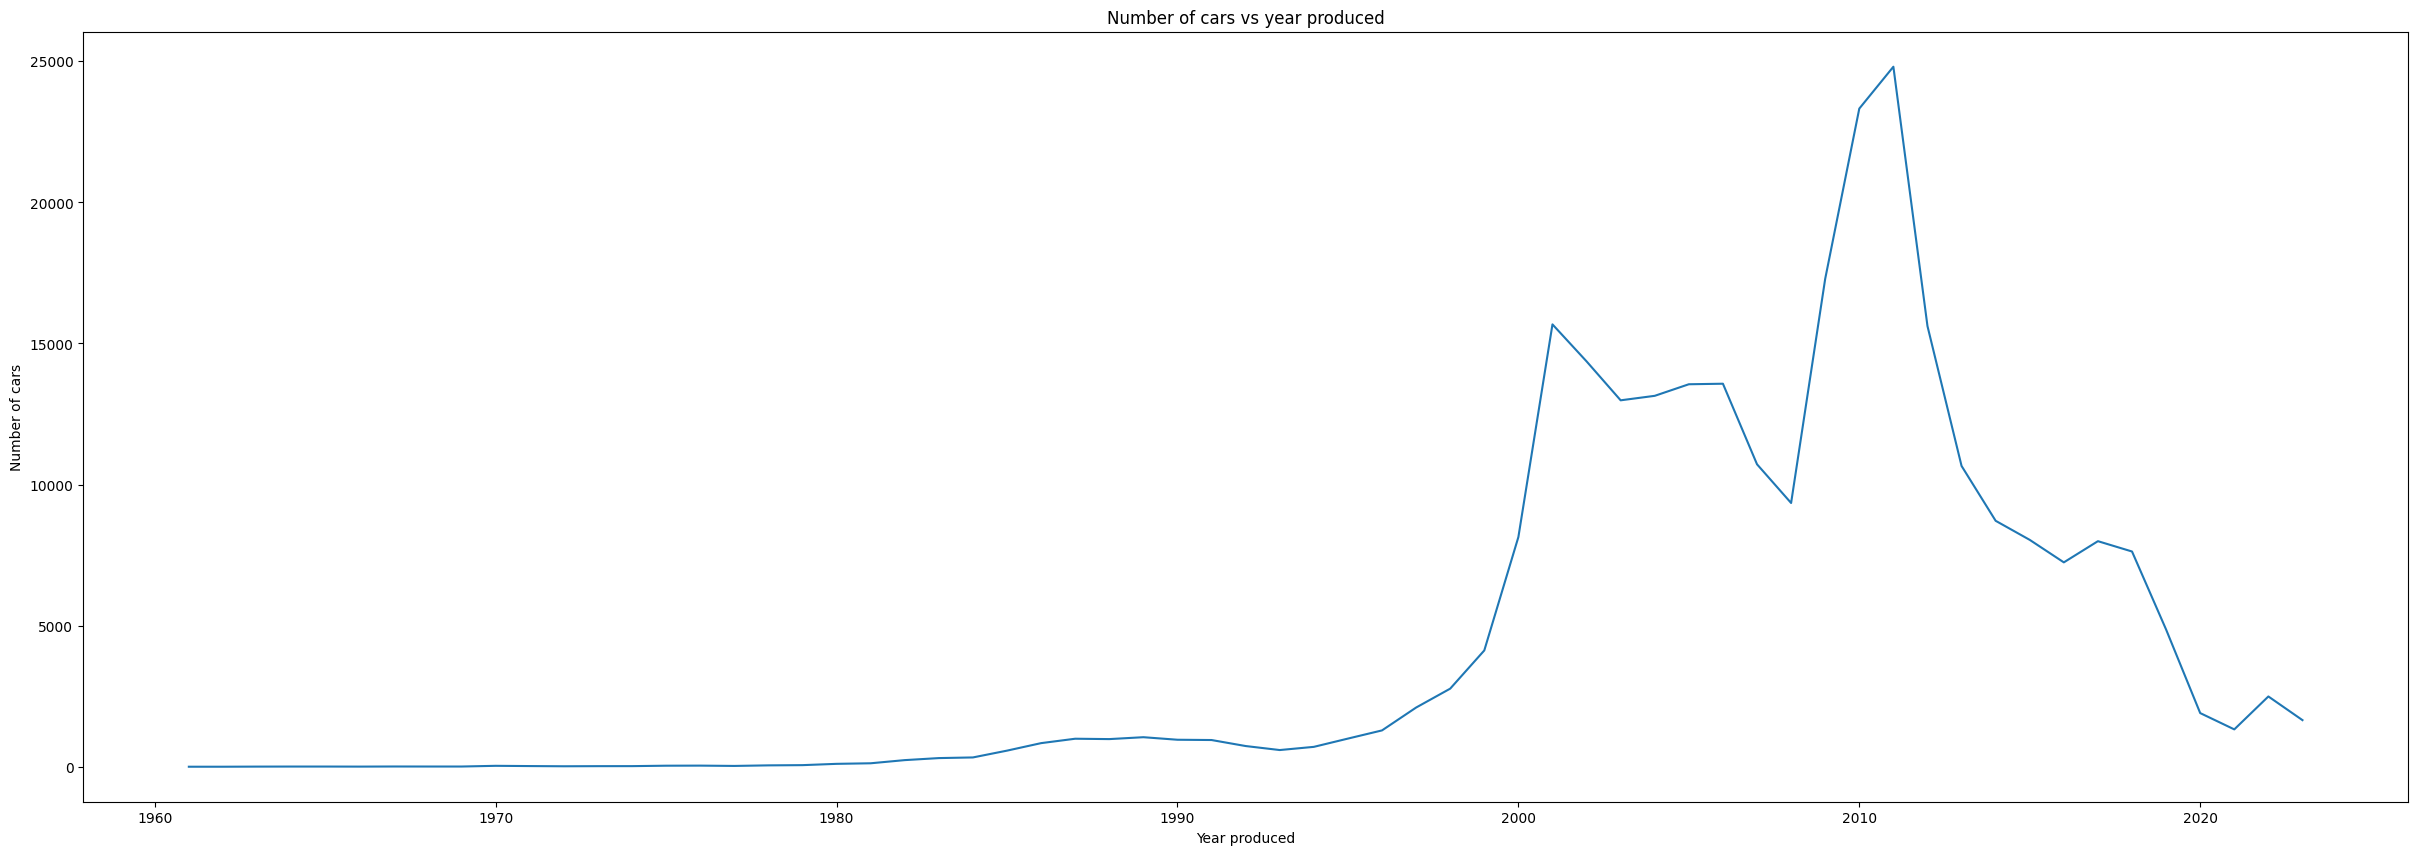

In [76]:
df.groupby('godiste')['ime'].count().plot(
    ylabel="Number of cars",
    xlabel="Year produced",
    title="Number of cars vs year produced",
    figsize=[30,10]
)

<a name="mileage"></a>
# 5 Mileage
[Back to table of contents](#table_content)

<Axes: title={'center': 'Number of cars vs mileage'}, xlabel='Mileage', ylabel='Number of cars'>

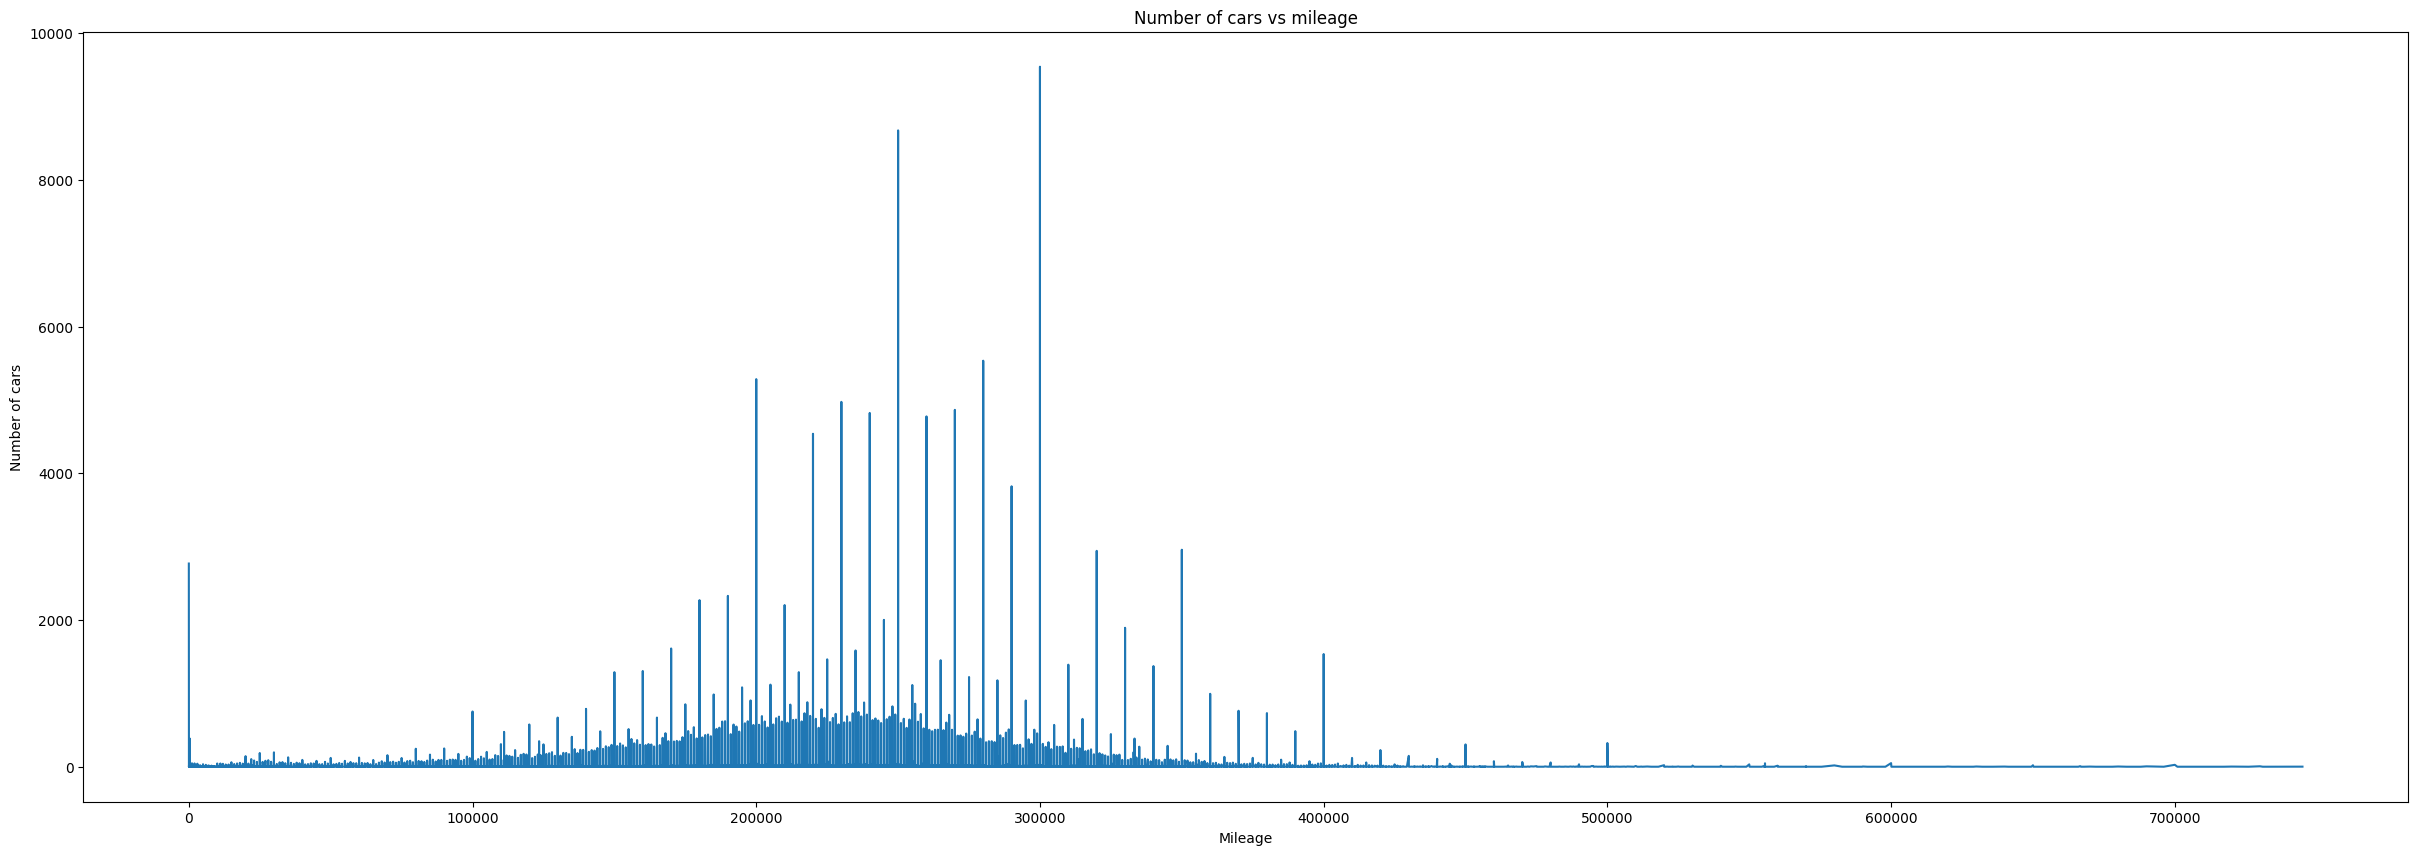

In [77]:
df.groupby('kilometraza')['ime'].count().plot(
    ylabel = "Number of cars",
    xlabel = "Mileage",
    title="Number of cars vs mileage",
)

**People seem to be rounding mileage (which is expected), especially around big numbers like 200 000, 250 000, 300 000.**
**And since there seems to be the dip in number of cars after each of these, most people are rounding down.**

## Average km driven for all cars

In [78]:
df.kilometraza.mean()

226211.1673021287

<a name="fuel"></a>
# 6 Fuel type
[Back to table of contents](#table_content)

In [89]:
fuel_cars = df.groupby('gorivo')['ime'].count()
fuel_km = df.groupby('gorivo')['kilometraza'].mean().astype(int)
fuel_age = round(df.groupby('gorivo')['godiste'].mean(),2)
fuel_km_per_year = (df.groupby('gorivo')['kilometraza'].mean()/(2022-df.groupby('gorivo')['godiste'].mean())).astype(int)
fuel_price = df.groupby('gorivo')['cijena'].mean().astype(int)
fuel_val = pd.DataFrame({'cars':fuel_cars,
                         'avg km': fuel_km,
                         'avg year': fuel_age,
                         'avg km per year':fuel_km_per_year,
                         'avg price':fuel_price})
fuel_val

,cars,avg km,avg year,avg km per year,avg price
gorivo,,,,,
Benzin,45780,186755,2004.92,10936,12588
Dizel,220707,234126,2008.60,17473,17663
Elektro,197,50928,2018.81,15950,84937
Hibrid,583,64897,2019.25,23573,60965
Plin,8901,247375,2002.55,12720,6283


<Axes: xlabel='gorivo'>

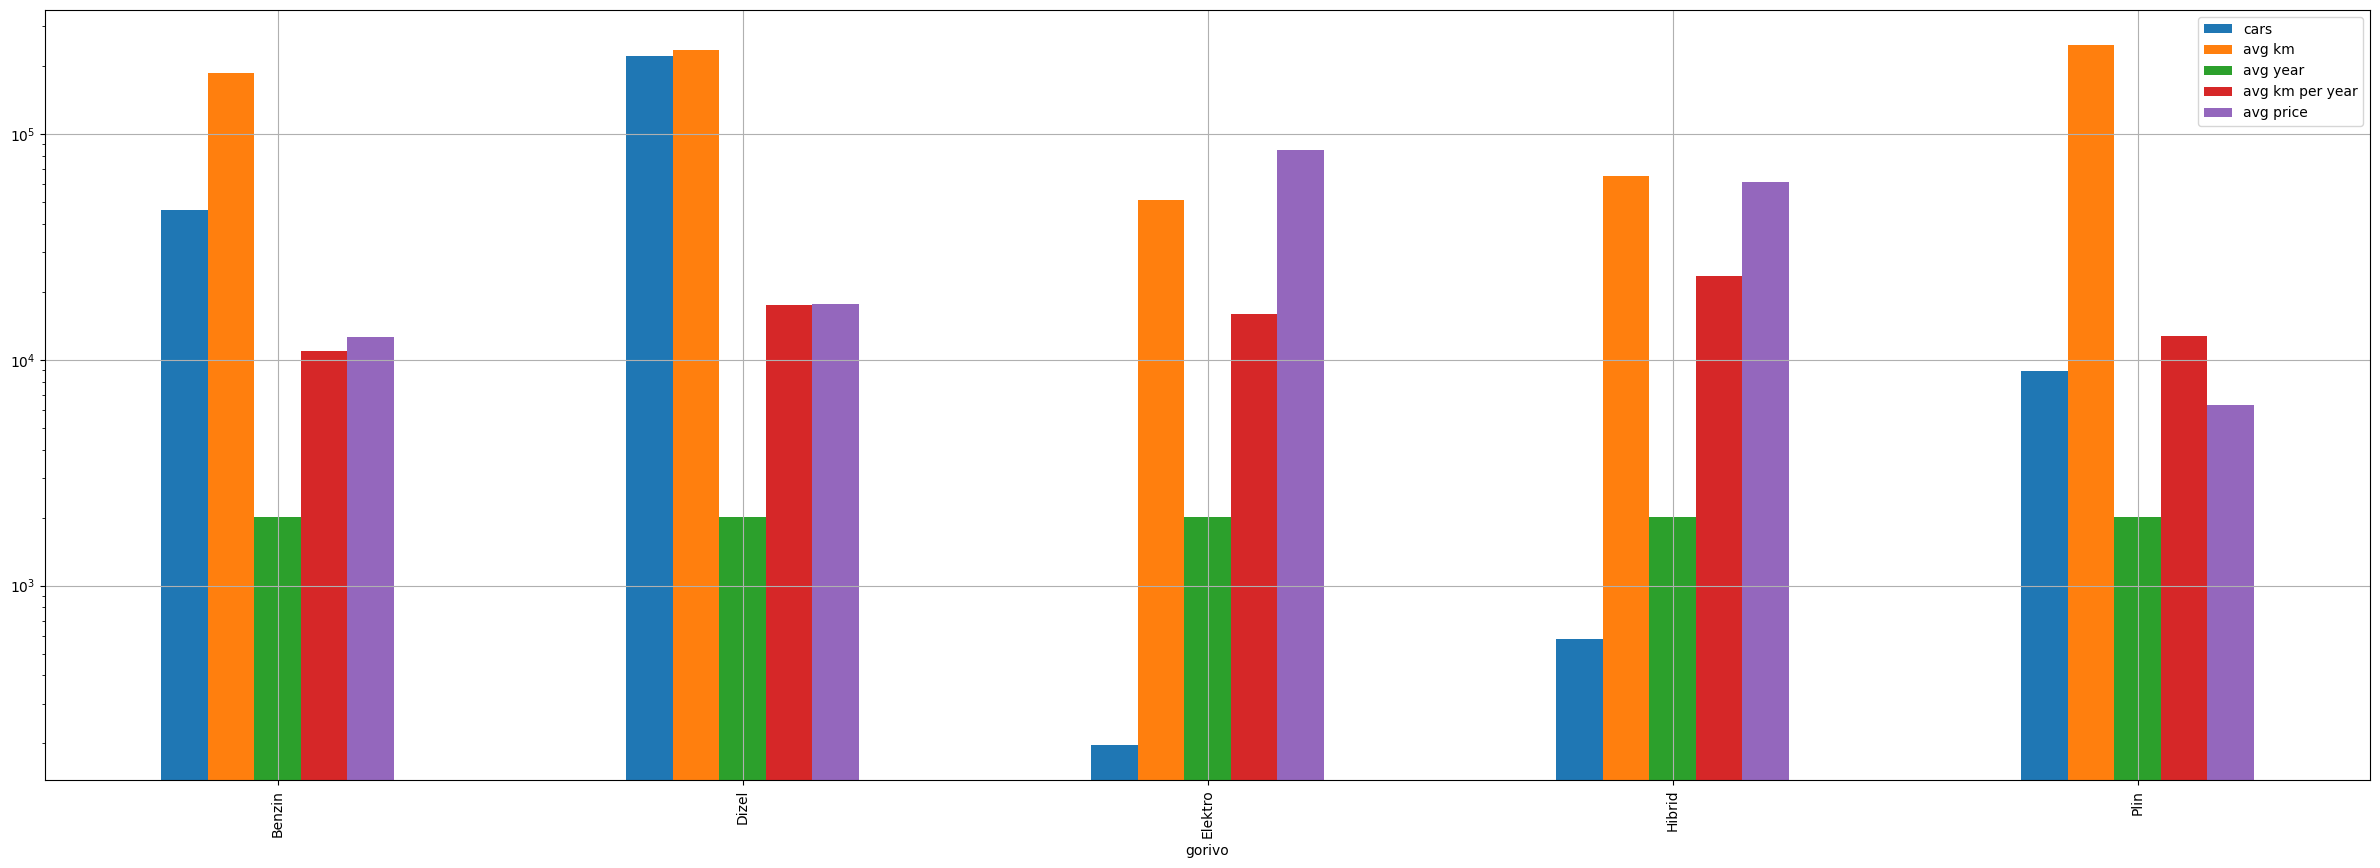

In [91]:
# Same data but as a graph
fuel_val.plot(kind='bar', logy=True, grid=True)

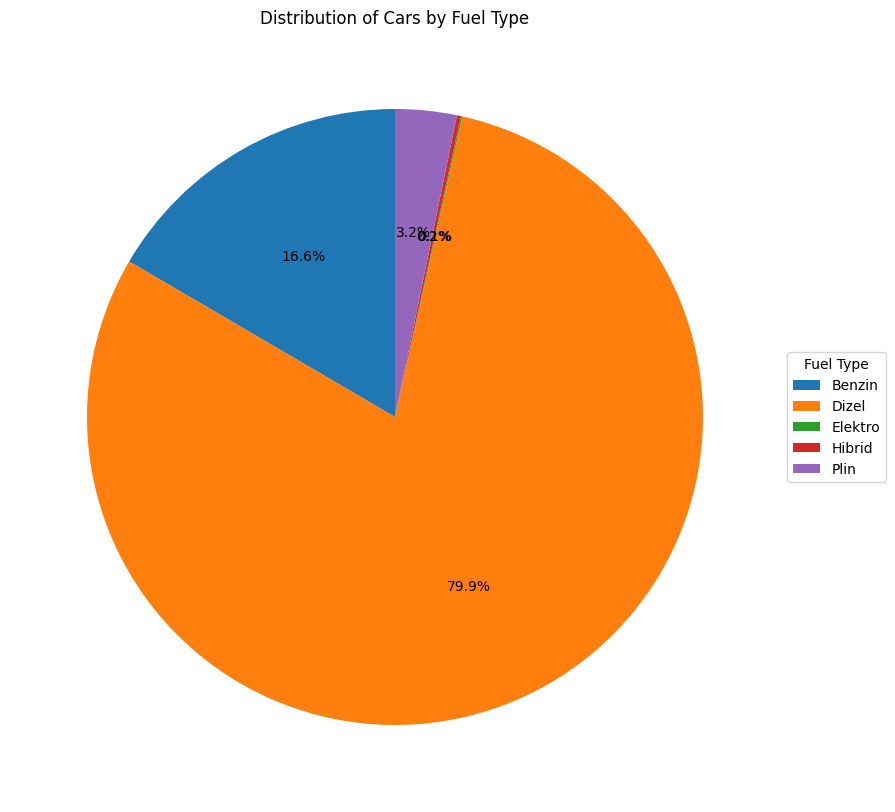

In [90]:
fig, ax = plt.subplots()
pie = ax.pie(fuel_val['cars'], autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Cars by Fuel Type')
ax.set_ylabel('')
ax.legend(pie[0], fuel_val.index, title='Fuel Type', loc="center left", bbox_to_anchor=(1, 0.5))

<a name="diesel_petrol"></a>
## 6.1 Market share of different types
[Back to table of contents](#table_content)

Number of cars grouped by fuel type and year produced.

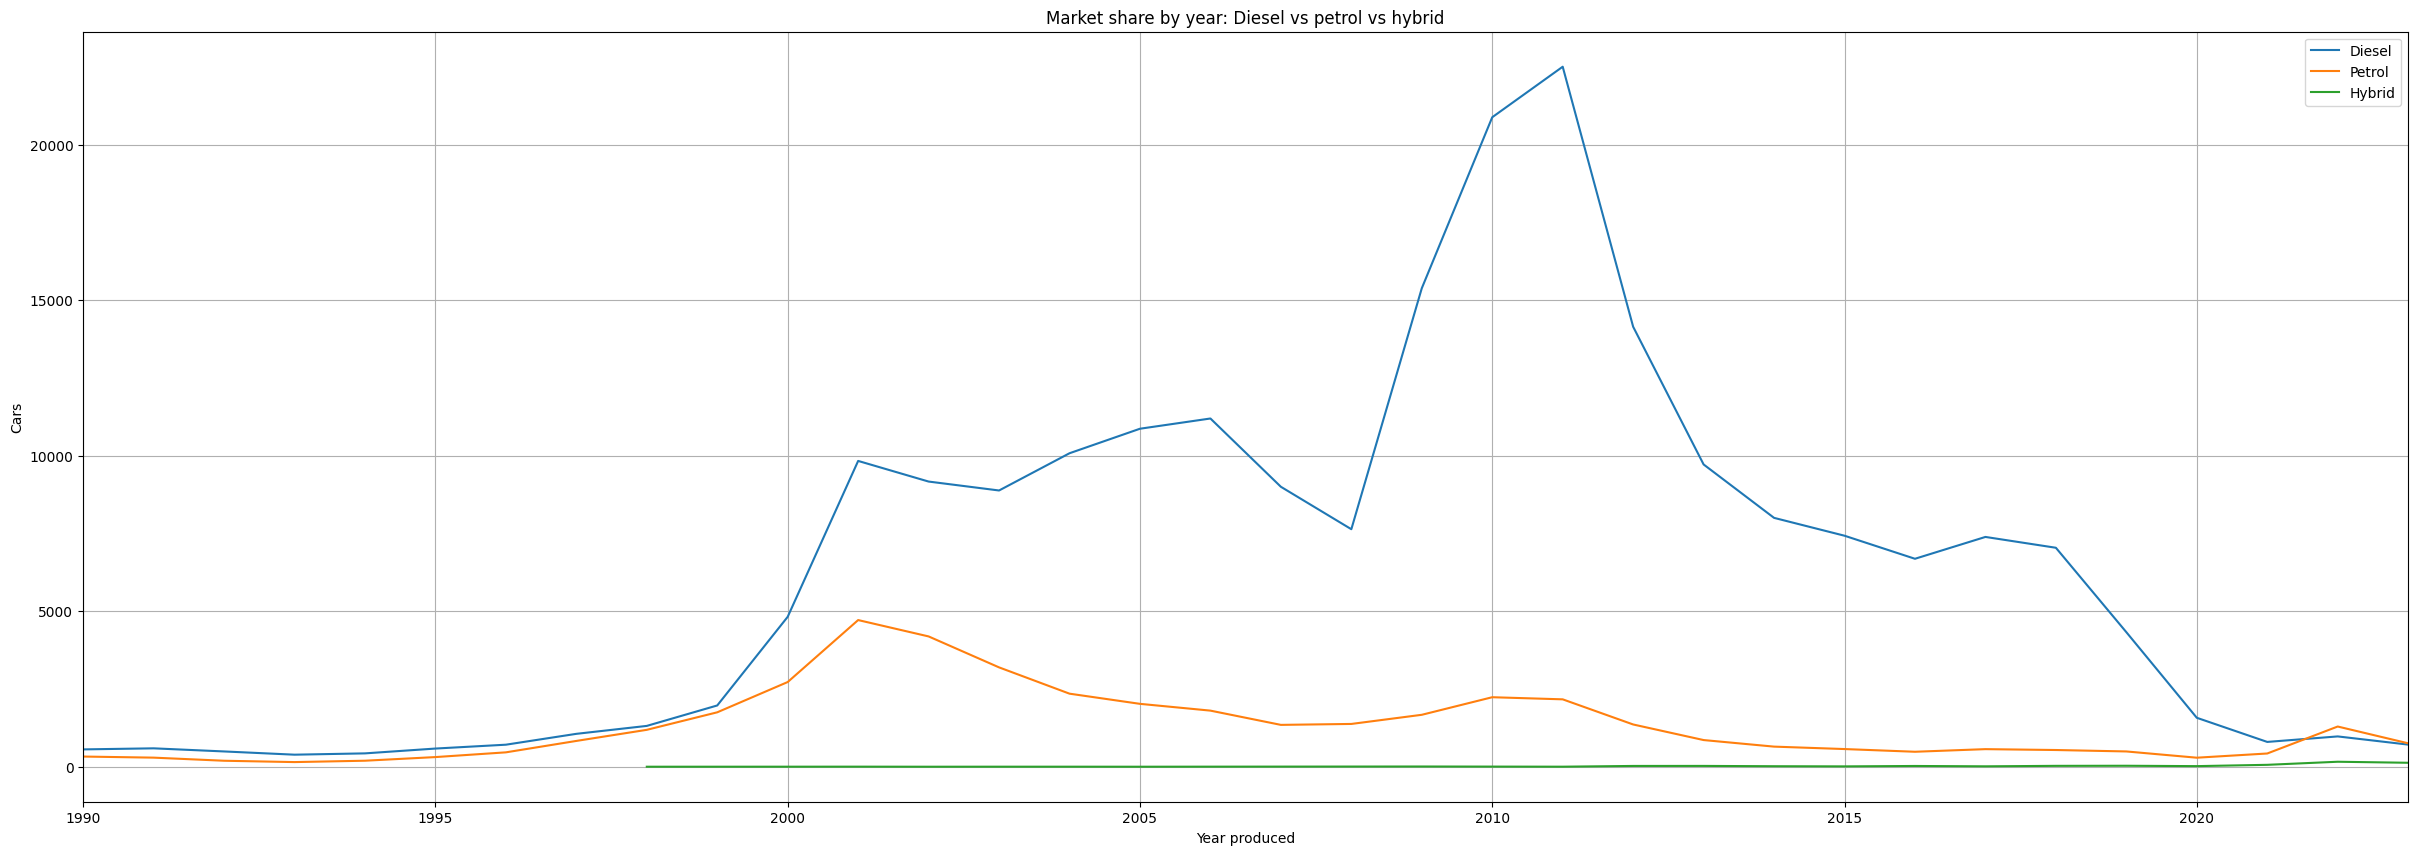

<Figure size 2000x1000 with 0 Axes>

In [108]:
diesel = df.loc[df['gorivo'] == 'Dizel', 'godiste'].value_counts().sort_index()
petrol = df.loc[df['gorivo'] == 'Benzin', 'godiste'].value_counts().sort_index()
hybrid = df.loc[df['gorivo'] == 'Hibrid', 'godiste'].value_counts().sort_index()
plt.plot(diesel, label='Diesel')
plt.plot(petrol, label='Petrol')
plt.plot(hybrid, label='Hybrid')
plt.legend()
plt.title('Market share by year: Diesel vs petrol vs hybrid')
plt.xlabel('Year produced')
plt.ylabel('Cars')
plt.grid()
plt.xlim([1990, 2023])
plt.figure(figsize=(20,10))
plt.show()

<a name="dealerships_individuals"></a>
# 7 Dealerships vs individuals
[Back to table of contents](#table_content)


Trying to see some differences based on who is selling the car. If user had business profile on listing websites they were marked as a dealership and if a user had a regular profile they were marked as an individual.

<a name="dealerships_mileage"></a>
## 7.1 Dealership changing mileage
[Back to table of contents](#table_content)

Average km driven for cars grouped by the year they were made and by seller type. Trying to see if dealerships are messing with odometer. If dealerships were chaning mileage and individuals weren't we would expect to see lower mileage on cars sold by dealerships.

In [96]:
dealerships_data = df.loc[df.radnja == 1]
individuals_data = df.loc[df.radnja == 0]
print(f"Listings by dealerships: {dealerships_data.shape[0]}")
print(f"Listings by individuals: {individuals_data.shape[0]}")

Listings by dealerships: 59426
Listings by individuals: 216075


<Figure size 2000x1000 with 0 Axes>

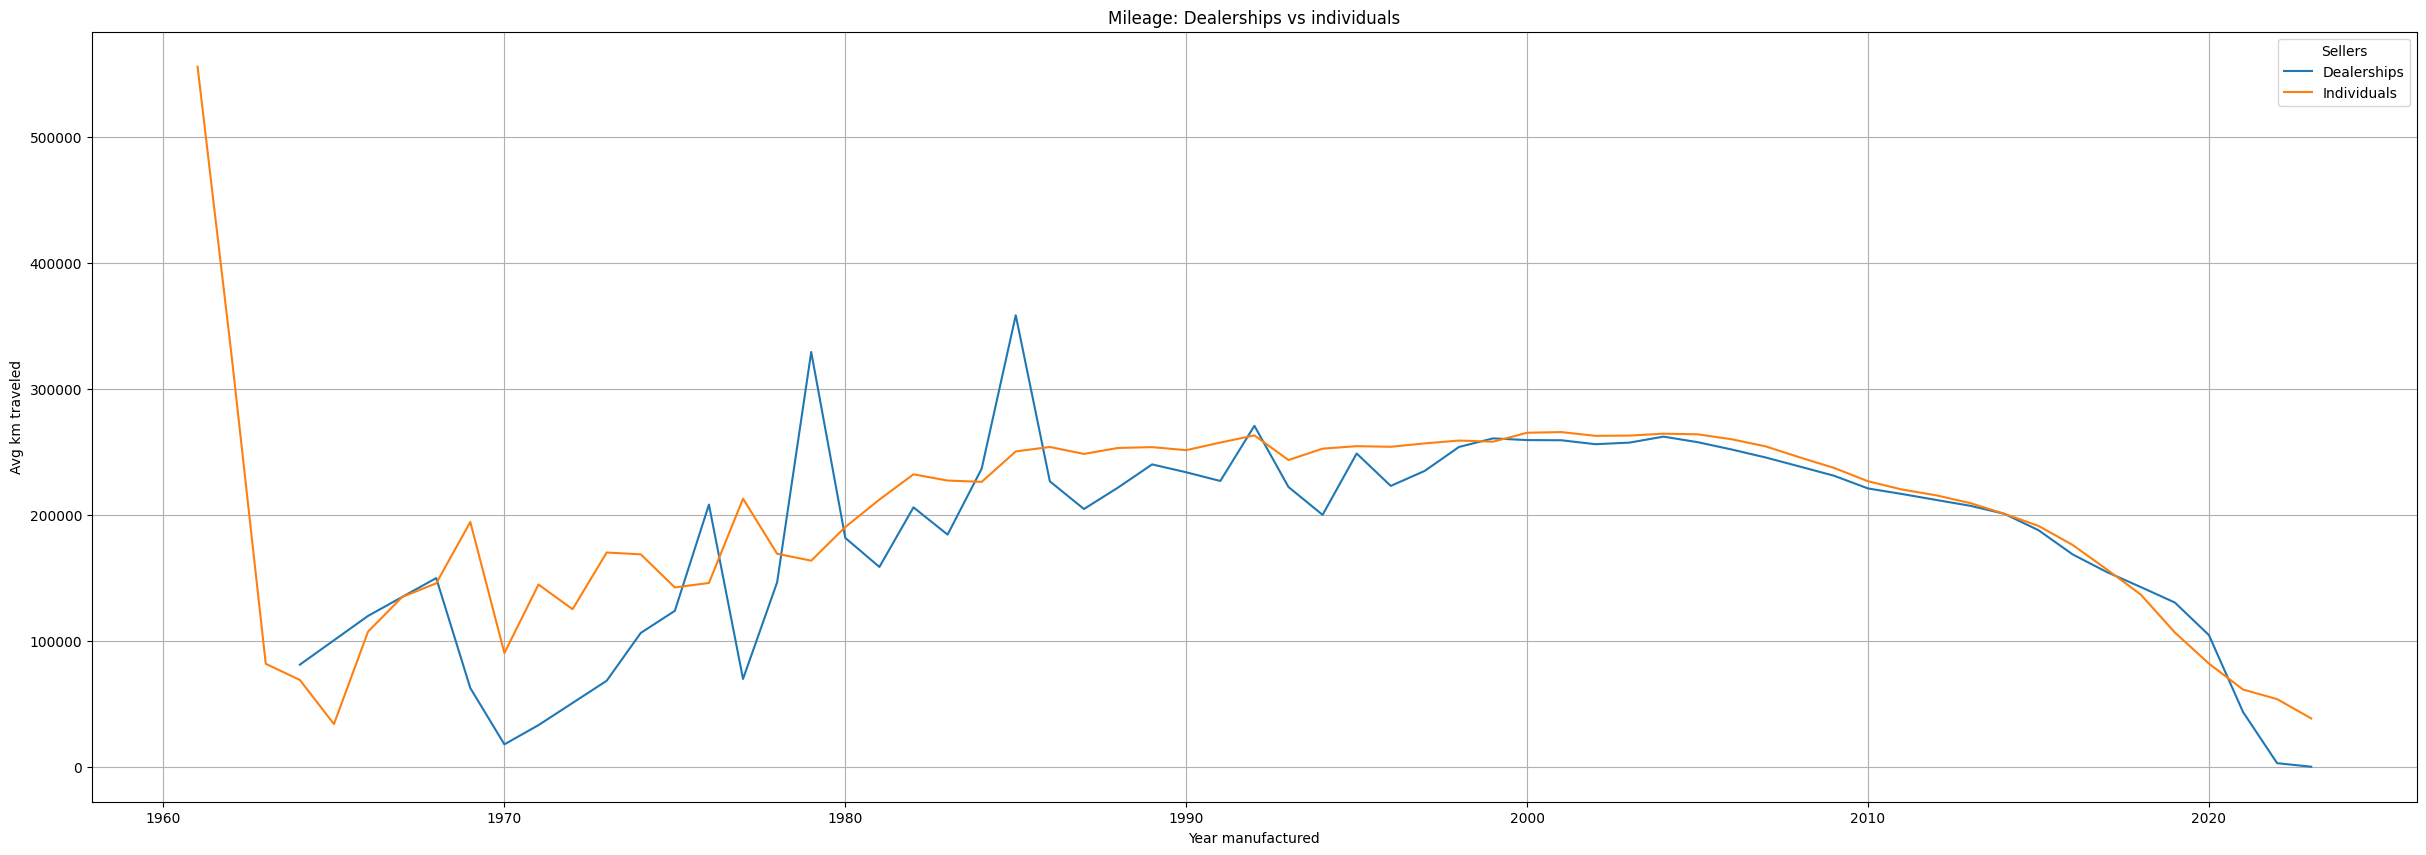

<Figure size 2000x1000 with 0 Axes>

In [98]:
total_mileage = df.groupby('godiste')['kilometraza'].mean()
dealerships_mileage = dealerships_data.groupby('godiste')['kilometraza'].mean()
individuals_mileage = individuals_data.groupby('godiste')['kilometraza'].mean()
plt.plot(dealerships_mileage, label='Dealerships')
plt.plot(individuals_mileage, label='Individuals')
plt.xlabel('Year manufactured')
plt.ylabel('Avg km traveled')
plt.legend(title='Sellers')
plt.title('Mileage: Dealerships vs individuals')
plt.grid()
plt.figure(figsize=(20,10))

**There seems to be no noticeable difference.**
**For cars made before 2000 we don't have enough data so we can just look at the newer cars.**


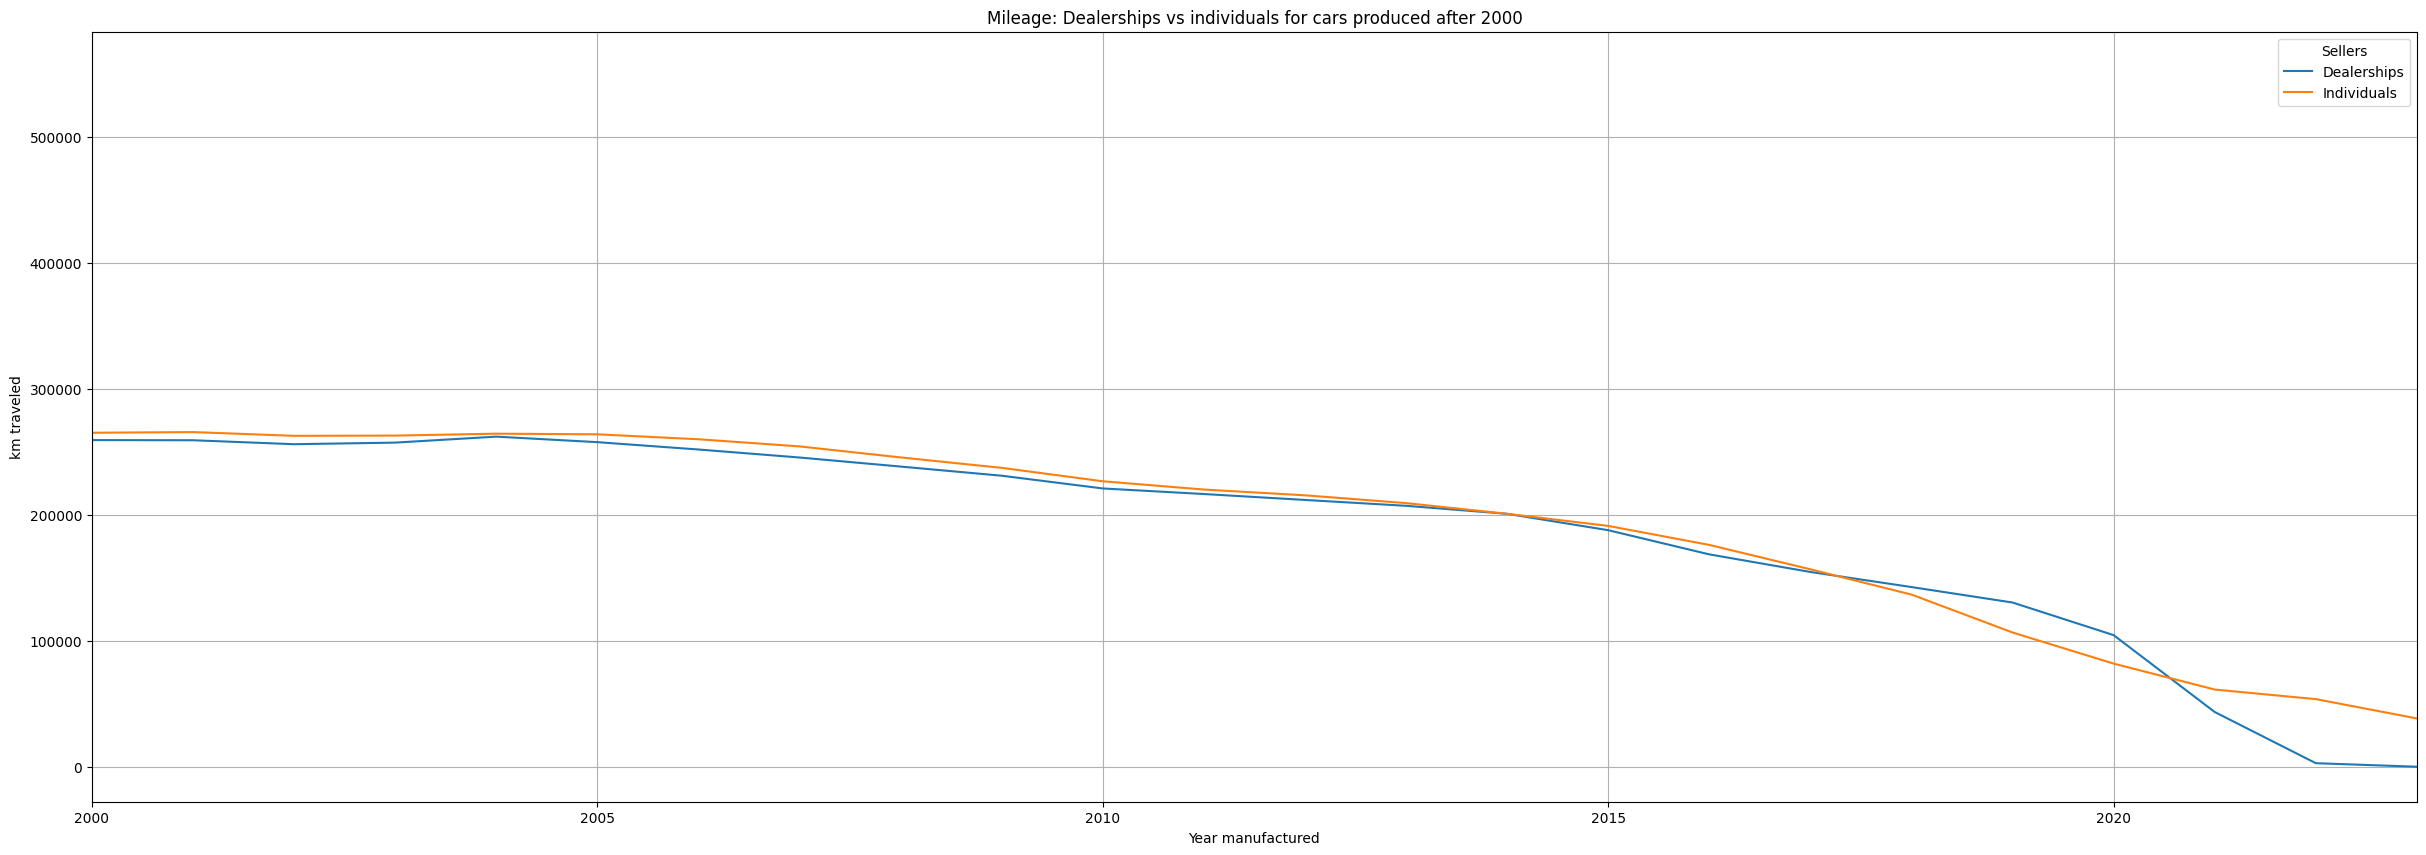

In [99]:
plt.plot(dealerships_mileage, label='Dealerships')
plt.plot(individuals_mileage, label='Individuals')
plt.xlabel('Year manufactured')
plt.ylabel('km traveled')
plt.legend(title='Sellers')
plt.title('Mileage: Dealerships vs individuals for cars produced after 2000')
plt.xlim([2000, 2023])
plt.grid()
plt.show()

**There seems to be no difference, at least with data available.**

**I have personally checked many cars using carVertical and found many imported cars where odometer has been reduced by 100 000+ km.**

**It could be that either everyone is doing it, it's only done occasionally, it's done all the time by dealerships and individuals bought cars that were already tampered with, or something else that I didn't think of.**

<a name="price_difference"></a>
## 7.2 Price difference
[Back to table of contents](#table_content)

Avg price of cars grouped by age and by seller type.

**Number of cars as bars and average price as line.**

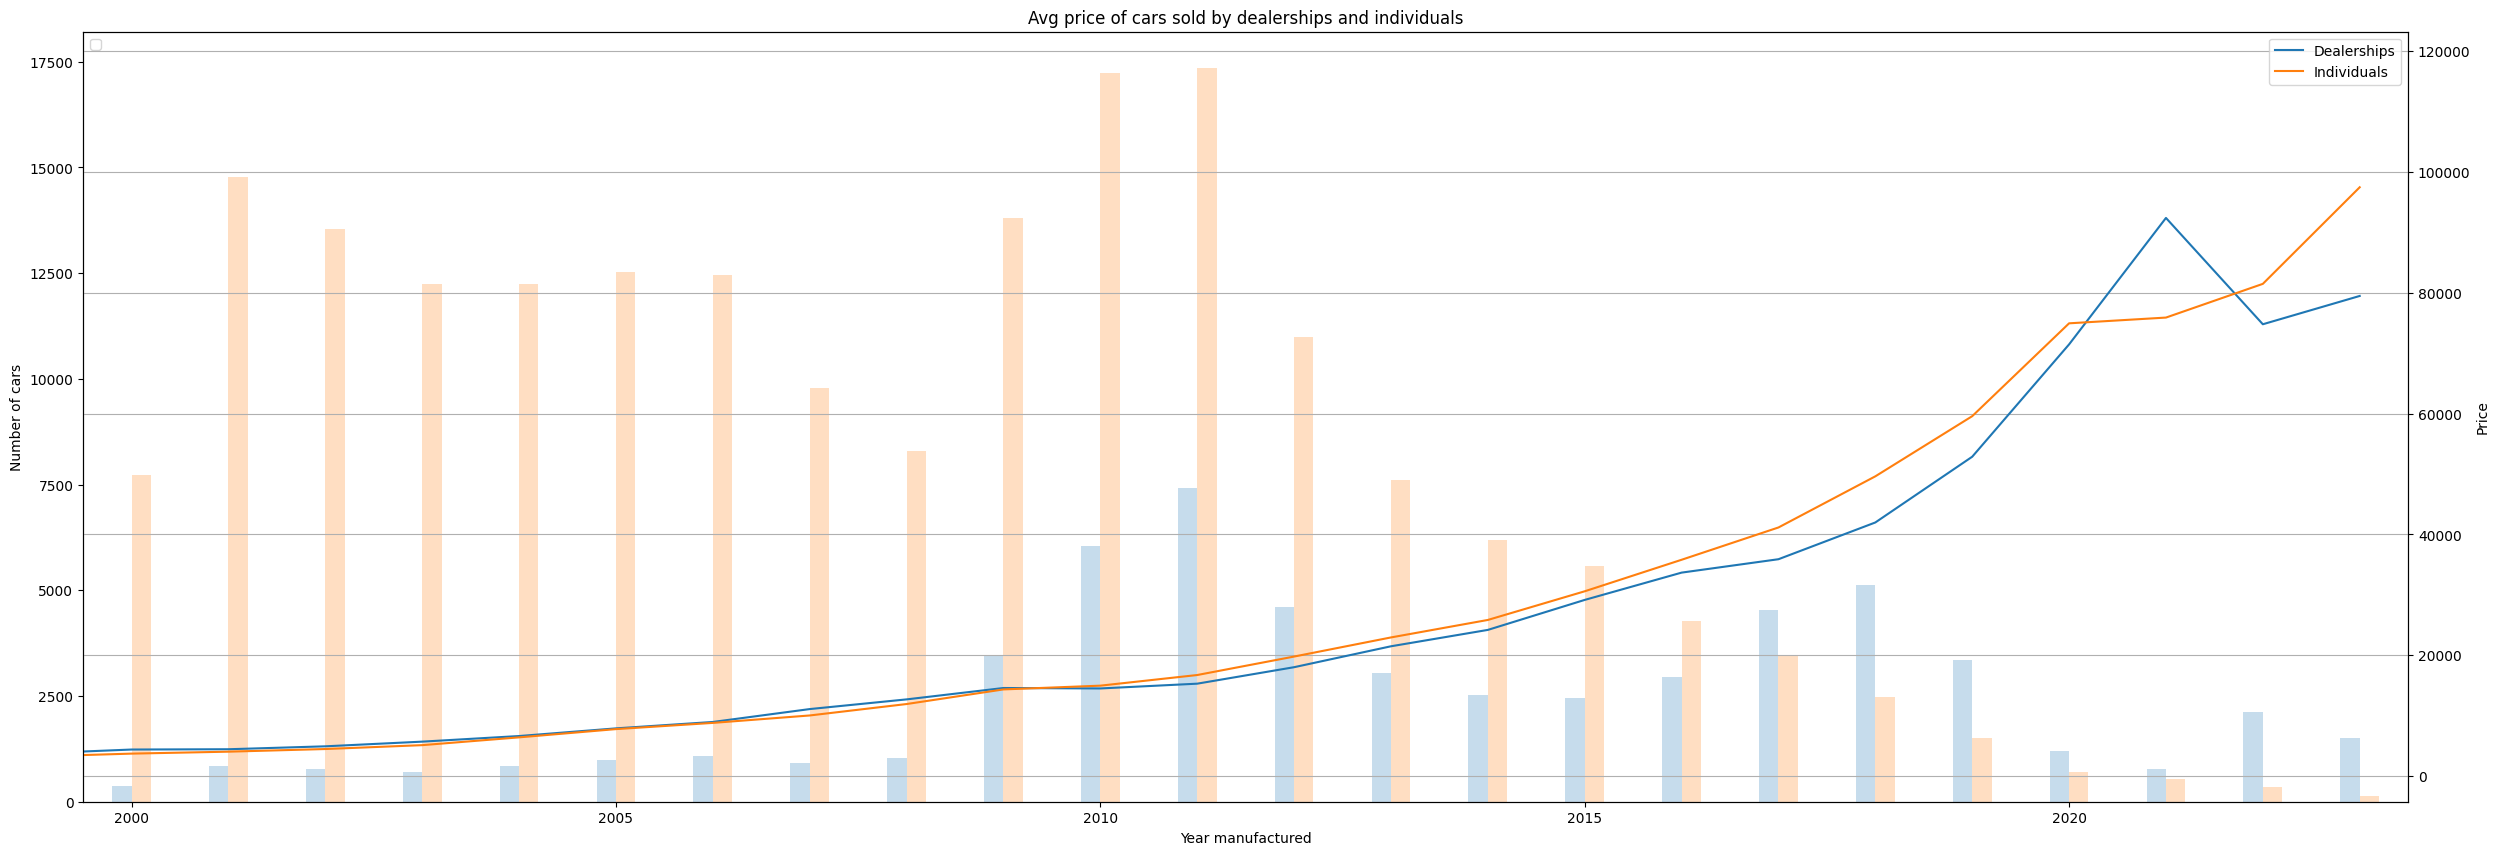

In [107]:

dealerships_price = dealerships_data.groupby('godiste')['cijena'].mean()
individuals_price = individuals_data.groupby('godiste')['cijena'].mean()
dealerships_cars = dealerships_data.groupby('godiste')['cijena'].count()
individuals_cars = individuals_data.groupby('godiste')['cijena'].count()

price_diff = pd.DataFrame({
    'dealerships_price': dealerships_price,
    'individuals_price': individuals_price,
    'dealerships_cars': dealerships_cars,
    'individuals_cars': individuals_cars,
})
price_diff.dropna(inplace=True)

fig, ax = plt.subplots()

width = 0.2
x_dealerships = [x - width/2 for x in list(price_diff.index)]
x_individuals = [x + width/2 for x in list(price_diff.index)]
ax.bar(x_dealerships, price_diff['dealerships_cars'], width=width, alpha=0.25)
ax.bar(x_individuals, price_diff['individuals_cars'], width=width, alpha=0.25)
ax.set_ylabel('Number of cars')
ax.set_xlabel('Year manufactured')
ax.legend(loc='upper left')

ax1 = ax.twinx()
ax1.plot(price_diff['dealerships_price'], label='Dealerships')
ax1.plot(price_diff['individuals_price'], label='Individuals')
ax1.set_ylabel('Price')
ax1.legend()

ax.set_title('Avg price of cars sold by dealerships and individuals')
plt.xlim(1999.5 ,2023.5)
plt.grid()
plt.show()

<a name="price_difference_10_30"></a>
## 7.3 Price difference at 10-30k BAM
[Back to table of contents](#table_content)

Avg price for cars with prices between 10 000 and 30 000 BAM. Grouped by seller type.

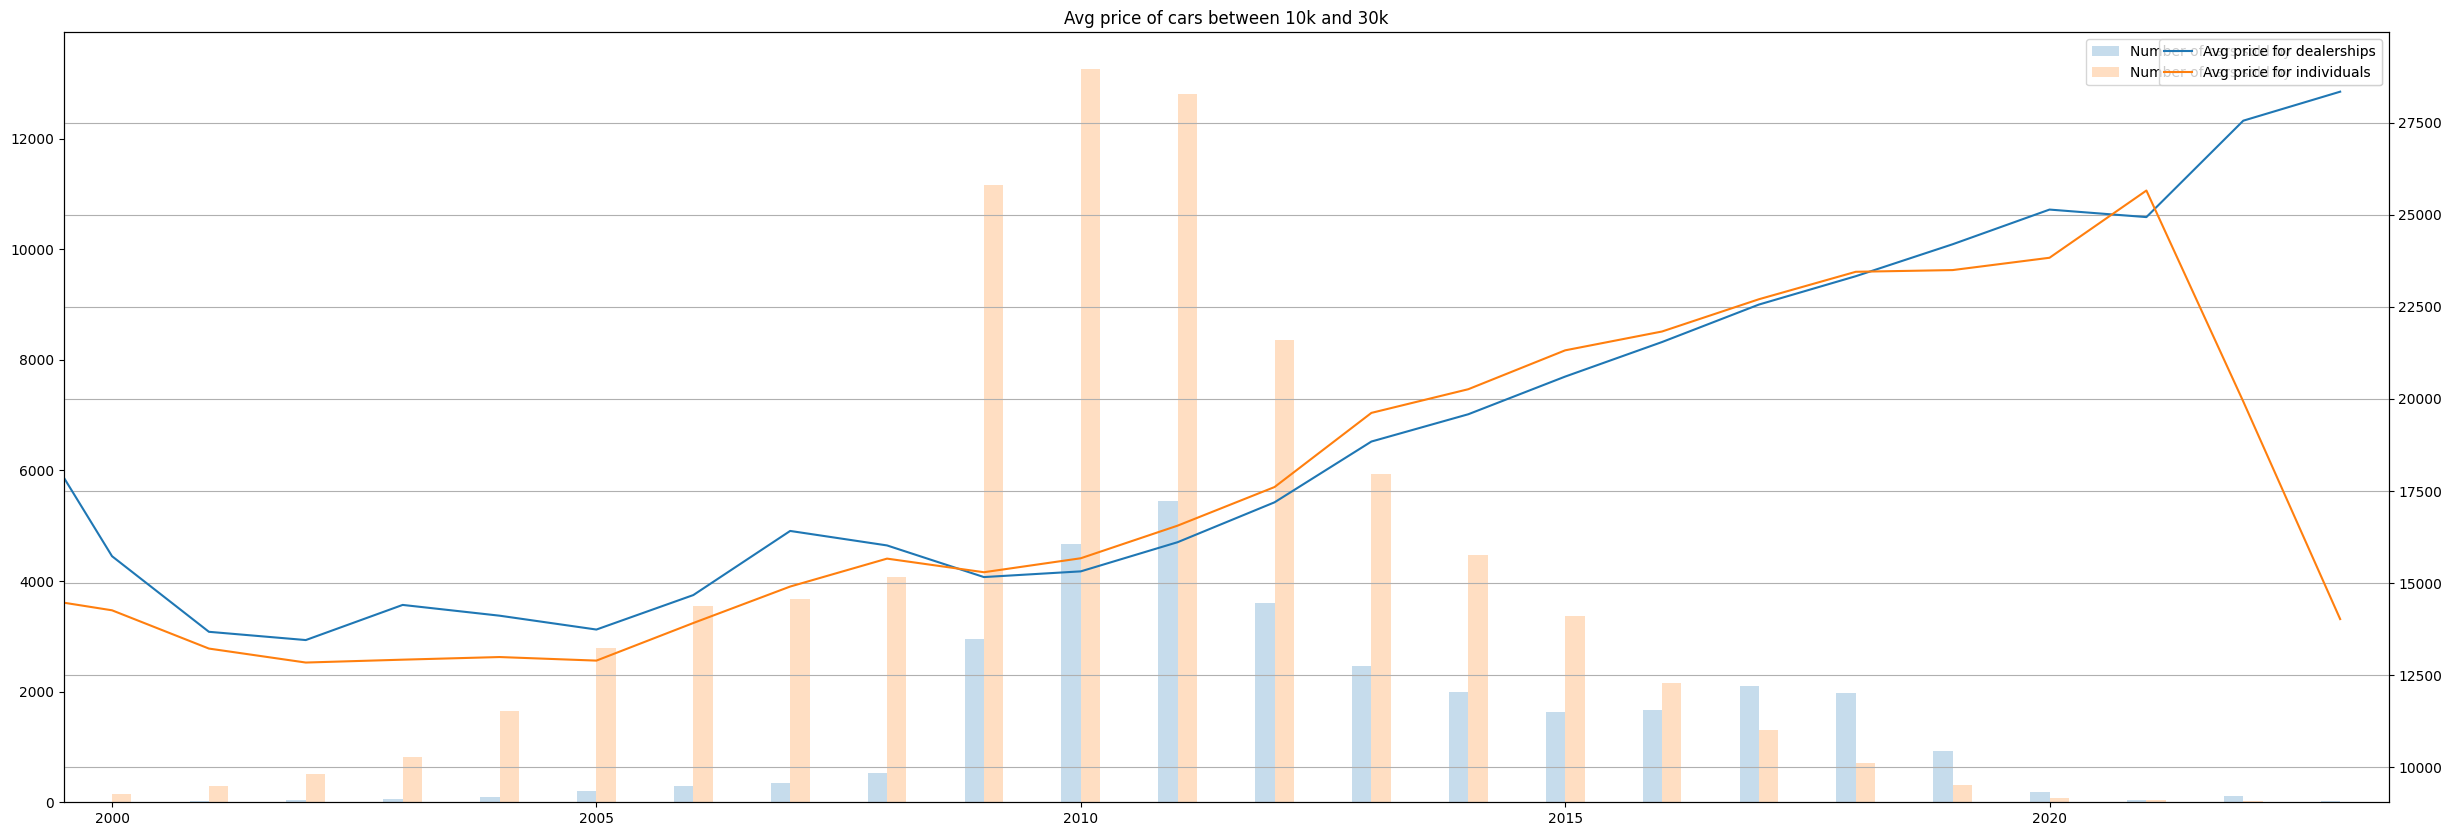

In [109]:
dealerships_sub50 = dealerships_data.query('cijena >= 10000 and cijena <= 30000')
individuals_sub50 = individuals_data.query('cijena >= 10000 and cijena <= 30000')

dealerships_price = dealerships_sub50.groupby('godiste')['cijena'].mean()
individuals_price = individuals_sub50.groupby('godiste')['cijena'].mean()
dealerships_cars = dealerships_sub50.groupby('godiste')['cijena'].count()
individuals_cars = individuals_sub50.groupby('godiste')['cijena'].count()

price_diff = pd.DataFrame({
    'dealerships_price': dealerships_price,
    'individuals_price': individuals_price,
    'dealerships_cars': dealerships_cars,
    'individuals_cars': individuals_cars,
})
price_diff.dropna(inplace=True)

fig, ax = plt.subplots()

width = 0.2
x_dealerships = [x - width/2 for x in list(price_diff.index)]
x_individuals = [x + width/2 for x in list(price_diff.index)]
ax.bar(x_dealerships, price_diff['dealerships_cars'], width=width, label='Number of cars sold by dealerships', alpha=0.25)
ax.bar(x_individuals, price_diff['individuals_cars'], width=width, label='Number of cars sold by individuals', alpha=0.25)
ax.legend()

ax1 = ax.twinx()
ax1.plot(price_diff['dealerships_price'], label='Avg price for dealerships')
ax1.plot(price_diff['individuals_price'], label='Avg price for individuals')
ax1.legend()

ax.set_title('Avg price of cars between 10k and 30k')
plt.xlim(1999.5 ,2023.5)
plt.grid()
plt.show()

<a name="man_data"></a>
# 8 Manufacturers data
[Back to table of contents](#table_content)

Overview of some basic avg. for different car manufacturers.

In [117]:
man_count = df.proizvodjac.value_counts()
man_age = df.groupby('proizvodjac')['godiste'].mean()
man_price = df.groupby('proizvodjac')['cijena'].mean().astype(int)
man_km = df.groupby('proizvodjac')['kilometraza'].mean().astype(int)
man_km_per_year = (man_km/(2024-man_age)).astype('int')
# Seems like broj_pregleda has some bad values
df['broj_pregleda'] = pd.to_numeric(df['broj_pregleda'], errors='coerce')
df['broj_pregleda'] = df['broj_pregleda'].fillna(0).astype(int)

man_views = df.groupby('proizvodjac')['broj_pregleda'].mean().astype(int)
man_days_listed = df.groupby('proizvodjac')['dana_objavljeno'].mean().round("D")

man_days_int = man_days_listed.astype('int')/86400000000000
man_views_per_day = round(man_views/man_days_int)


man_val = pd.DataFrame({"Number of cars": man_count,
                         "Avg year":round(man_age,1),
                         "Avg km": man_km,
                         "Avg km/year": man_km_per_year,
                         "Avg price":man_price,
                         "Avg views": man_views,
                         "Avg days published": man_days_listed,
                         "Avg views/day": man_views_per_day})
man_val.sort_values(by='Number of cars', ascending=False).head(20)

,Number of cars,Avg year,Avg km,Avg km/year,Avg price,Avg views,Avg days published,Avg views/day
Volkswagen,80224,2007.2,238484,14199,14913,418,19 days,22.0
Audi,29740,2008.7,236989,15528,25157,736,32 days,23.0
Mercedes-Benz,21020,2007.0,248217,14612,25618,876,47 days,19.0
Peugeot,17893,2008.9,216849,14338,11625,371,24 days,15.0
BMW,16151,2008.5,239249,15435,26362,936,40 days,23.0
Renault,15666,2007.5,216400,13088,8667,338,25 days,14.0
Opel,15647,2006.1,221583,12382,8330,413,30 days,14.0
Škoda,12444,2010.0,217218,15518,14821,508,23 days,22.0
Ford,10184,2006.6,225464,12986,9716,441,28 days,16.0
Citroen,9262,2010.3,204293,14939,12081,444,30 days,15.0


<a name="drive_a_lot"></a>
## 8.1 Drive a lot?
[Back to table of contents](#table_content)

Brands with most km/year.

**Filtering cars that have at least 100 listings.**

In [124]:
filtered_100 = man_val[man_val['Number of cars'] >= 100]
filtered_100.sort_values(by='Avg km/year', ascending=False).head(10)

,Number of cars,Avg year,Avg km,Avg km/year,Avg price,Avg views,Avg days published,Avg views/day
Skoda,7621,2011.3,213898,16908,16710,274,10 days,27.0
Volvo,3000,2011.2,205800,16083,30831,913,47 days,19.0
Iveco,101,2005.1,303613,16071,14766,15,6 days,2.0
Audi,29740,2008.7,236989,15528,25157,736,32 days,23.0
Škoda,12444,2010.0,217218,15518,14821,508,23 days,22.0
BMW,16151,2008.5,239249,15435,26362,936,40 days,23.0
Citroen,9262,2010.3,204293,14939,12081,444,30 days,15.0
Mercedes-Benz,21020,2007.0,248217,14612,25618,876,47 days,19.0
Porsche,871,2012.7,163248,14397,85814,1989,50 days,40.0
Peugeot,17893,2008.9,216849,14338,11625,371,24 days,15.0


<a name="cheap_man"></a>
## 8.2 Want a cheap car?
[Back to table of contents](#table_content)

Cheapest brands on avg.

In [125]:
filtered_100.sort_values(by='Avg price').head(10)

,Number of cars,Avg year,Avg km,Avg km/year,Avg price,Avg views,Avg days published,Avg views/day
Daewoo,199,2001.2,197233,8650,2228,296,37 days,8.0
Zastava,271,1987.5,130577,3574,3959,1716,69 days,25.0
Lada,466,2002.1,141668,6471,4873,1083,35 days,31.0
Fiat,7820,2004.3,210985,10693,5006,343,20 days,17.0
Lancia,298,2004.0,234689,11742,5207,703,59 days,12.0
Smart,608,2006.1,152024,8508,7519,574,28 days,20.0
Opel,15647,2006.1,221583,12382,8330,413,30 days,14.0
Alfa Romeo,1818,2005.4,234302,12612,8604,724,43 days,17.0
Renault,15666,2007.5,216400,13088,8667,338,25 days,14.0
Chevrolet,824,2008.7,170492,11114,9113,653,37 days,18.0


<a name="new_man"></a>
## 8.3 Want a newer car?
[Back to table of contents](#table_content)

Brands with that have newest avg year manufactured.

In [128]:
filtered_100.sort_values(by='Avg year', ascending=False).head(10)

,Number of cars,Avg year,Avg km,Avg km/year,Avg price,Avg views,Avg days published,Avg views/day
Dacia,1015,2013.2,142631,13187,15415,601,20 days,30.0
Porsche,871,2012.7,163248,14397,85814,1989,50 days,40.0
Skoda,7621,2011.3,213898,16908,16710,274,10 days,27.0
Volvo,3000,2011.2,205800,16083,30831,913,47 days,19.0
Kia,1249,2010.7,166110,12485,19817,612,35 days,17.0
Citroen,9262,2010.3,204293,14939,12081,444,30 days,15.0
Toyota,2643,2010.1,174454,12591,26083,1016,37 days,27.0
Škoda,12444,2010.0,217218,15518,14821,508,23 days,22.0
Hyundai,2195,2009.4,183744,12624,18471,729,37 days,20.0
Land Rover,1086,2009.3,200265,13605,40857,1094,36 days,30.0


<a name="sold_fast"></a>
## 8.4 What gets sold fast
[Back to table of contents](#table_content)

Every car is only checked once so it's impossible to tell how many days it will be listed before it gets sold. This just shows avg number of days that the listing has been published for a given brand.

In [131]:
filtered_100.sort_values(by='Avg days published').head(10)

,Number of cars,Avg year,Avg km,Avg km/year,Avg price,Avg views,Avg days published,Avg views/day
Iveco,101,2005.1,303613,16071,14766,15,6 days,2.0
Skoda,7621,2011.3,213898,16908,16710,274,10 days,27.0
Volkswagen,80224,2007.2,238484,14199,14913,418,19 days,22.0
Seat,6463,2007.8,223689,13842,9688,326,19 days,17.0
Fiat,7820,2004.3,210985,10693,5006,343,20 days,17.0
Dacia,1015,2013.2,142631,13187,15415,601,20 days,30.0
Škoda,12444,2010.0,217218,15518,14821,508,23 days,22.0
Peugeot,17893,2008.9,216849,14338,11625,371,24 days,15.0
Renault,15666,2007.5,216400,13088,8667,338,25 days,14.0
Smart,608,2006.1,152024,8508,7519,574,28 days,20.0


<a name="not_sold"></a>
## 8.5 What isn't getting sold
[Back to table of contents](#table_content)

Same as the previous except we now show what has been listed the longest.


In [132]:
filtered_100.sort_values(by='Avg days published', ascending=False).head(10)

,Number of cars,Avg year,Avg km,Avg km/year,Avg price,Avg views,Avg days published,Avg views/day
Chrysler,204,2004.5,208860,10705,10265,882,104 days,8.0
Isuzu,109,1999.2,189443,7633,19530,2220,80 days,28.0
Jaguar,282,2008.9,187729,12432,28002,1387,72 days,19.0
Zastava,271,1987.5,130577,3574,3959,1716,69 days,25.0
Subaru,266,2005.1,198078,10499,9690,1398,63 days,22.0
Lancia,298,2004.0,234689,11742,5207,703,59 days,12.0
Ssangyong,259,2005.2,230661,12284,10153,802,58 days,14.0
Honda,281,2003.4,216214,10489,11061,5969,56 days,107.0
Porsche,871,2012.7,163248,14397,85814,1989,50 days,40.0
Jeep,949,2005.8,185225,10168,25797,1274,49 days,26.0


<a name="most_viewed"></a>
## 8.6 Most viewed
[Back to table of contents](#table_content)

In [134]:
filtered_100.sort_values(by='Avg views/day', ascending=False).head(10)

,Number of cars,Avg year,Avg km,Avg km/year,Avg price,Avg views,Avg days published,Avg views/day
Honda,281,2003.4,216214,10489,11061,5969,56 days,107.0
Porsche,871,2012.7,163248,14397,85814,1989,50 days,40.0
Lada,466,2002.1,141668,6471,4873,1083,35 days,31.0
Dacia,1015,2013.2,142631,13187,15415,601,20 days,30.0
Land Rover,1086,2009.3,200265,13605,40857,1094,36 days,30.0
Mitsubishi,874,2000.4,225889,9559,13281,1235,42 days,29.0
Mazda,1217,2008.9,200243,13255,17732,1081,38 days,28.0
Isuzu,109,1999.2,189443,7633,19530,2220,80 days,28.0
Toyota,2643,2010.1,174454,12591,26083,1016,37 days,27.0
Suzuki,1260,2006.7,146036,8418,16035,955,35 days,27.0


<a name="man_age"></a>
# 9 Age for different manufacturers
[Back to table of contents](#table_content)

Number of cars listed that have been produced in a given year, for top 10 most common brands.

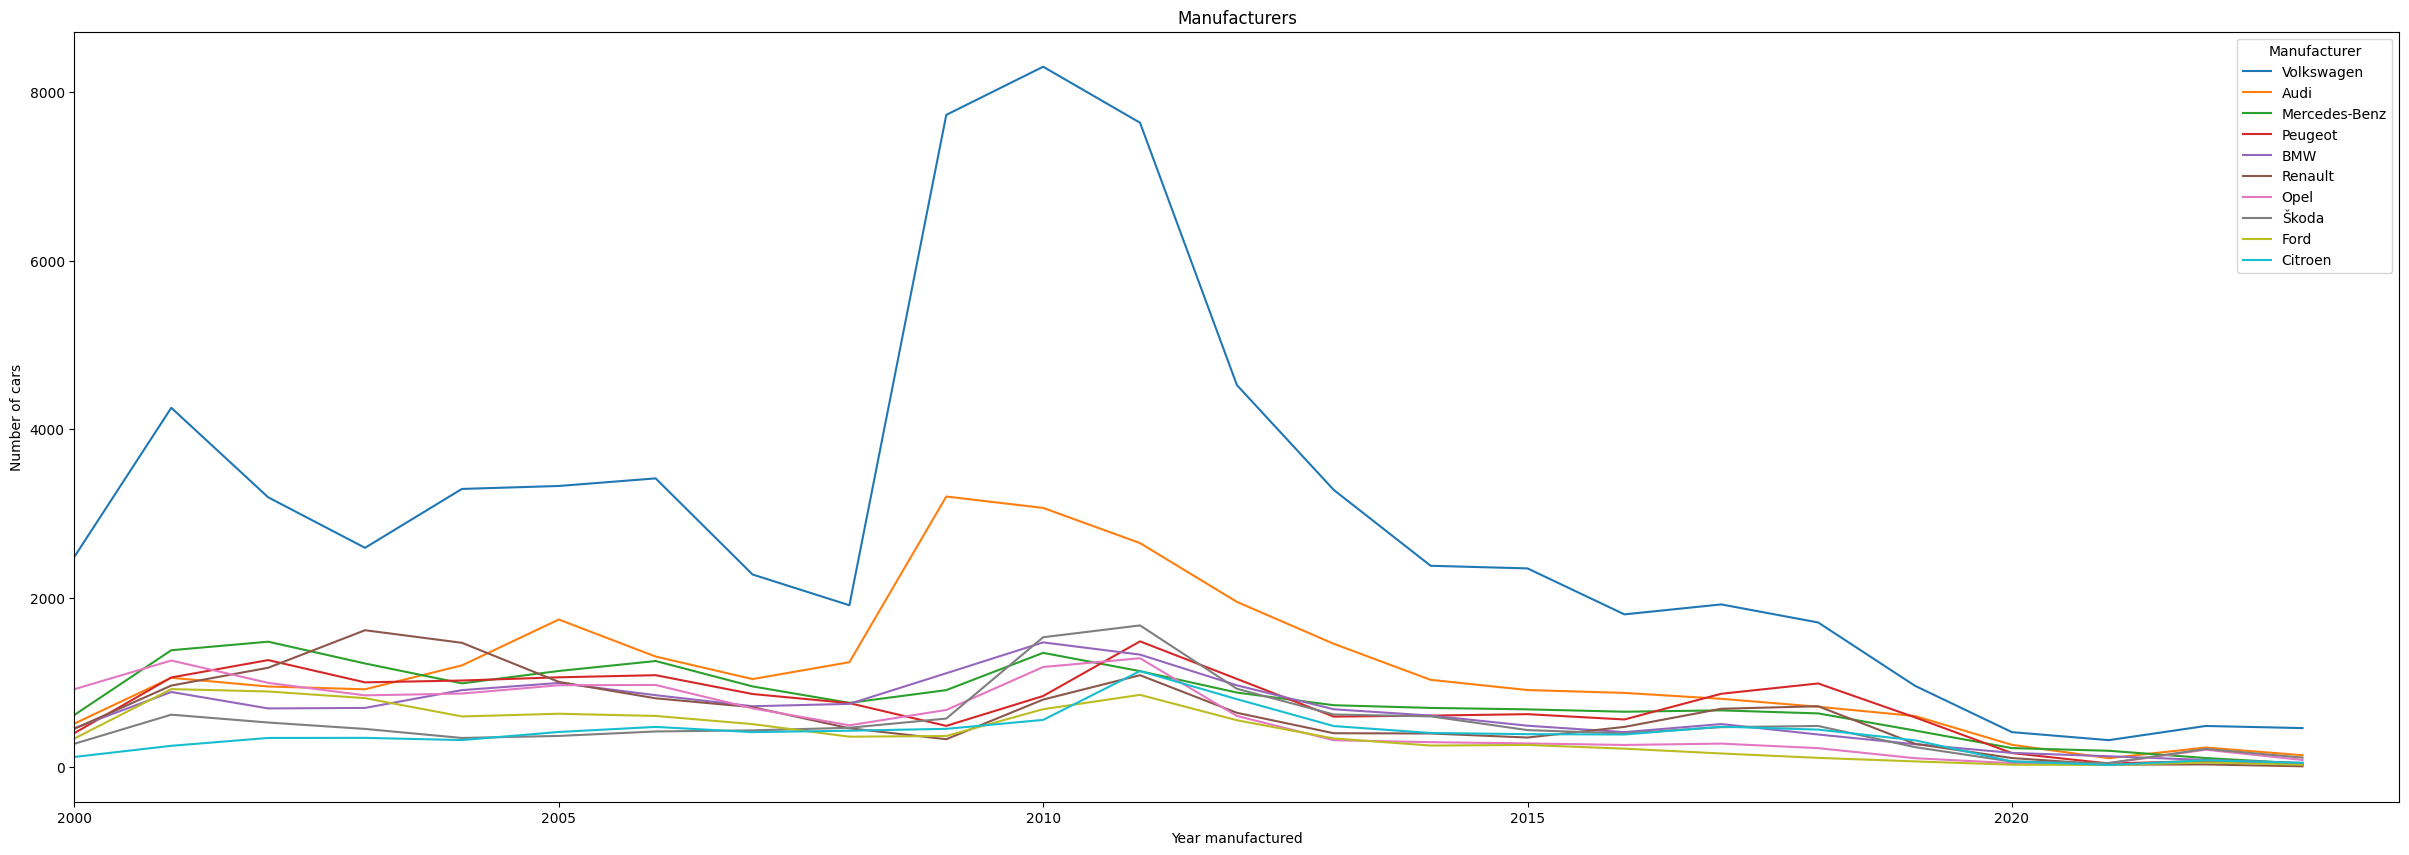

In [136]:
for man in man_prc.index[:10]:
    man_spread_df = df.loc[df['proizvodjac'] == man, ['ime', 'godiste']]
    man_spread_year = man_spread_df.groupby('godiste').count()
    plt.plot(man_spread_year, label=man)
    plt.xlabel('Year manufactured')
    plt.ylabel('Number of cars')
    plt.legend(title='Manufacturer')
    plt.title('Manufacturers')
    plt.xlim([2000, 2024])
plt.show()

<a name="car_depreciation"></a>
# 10 Car price depreciation
[Back to table of contents](#table_content)

Not sure what would be the best way to find this. I would have to have for example, a price for a 2012 Golf for every year since 2012. Doing it like this is like comparing apples to oranges, since cars manufactured in 2020 are different from cars made in 2010. Also forget about bitcoin looks we should just buy Fabia.

Golf	2010 price: 13858	2020 price: 43864	Price lost: 68%
Passat	2010 price: 12827	2020 price: 50902	Price lost: 75%
Octavia	2010 price: 12705	2020 price: 42674	Price lost: 70%
A4	2010 price: 17801	2020 price: 64488	Price lost: 72%
A6	2010 price: 19083	2020 price: 91392	Price lost: 79%
Fabia	2010 price: 9044	2020 price: 2500	Price lost: -262%
A3	2010 price: 14798	2020 price: 40507	Price lost: 63%
Polo	2010 price: 10734	2020 price: 46974	Price lost: 77%
Astra	2010 price: 10562	2020 price: 22912	Price lost: 54%
Megane	2010 price: 9542	2020 price: 31147	Price lost: 69%


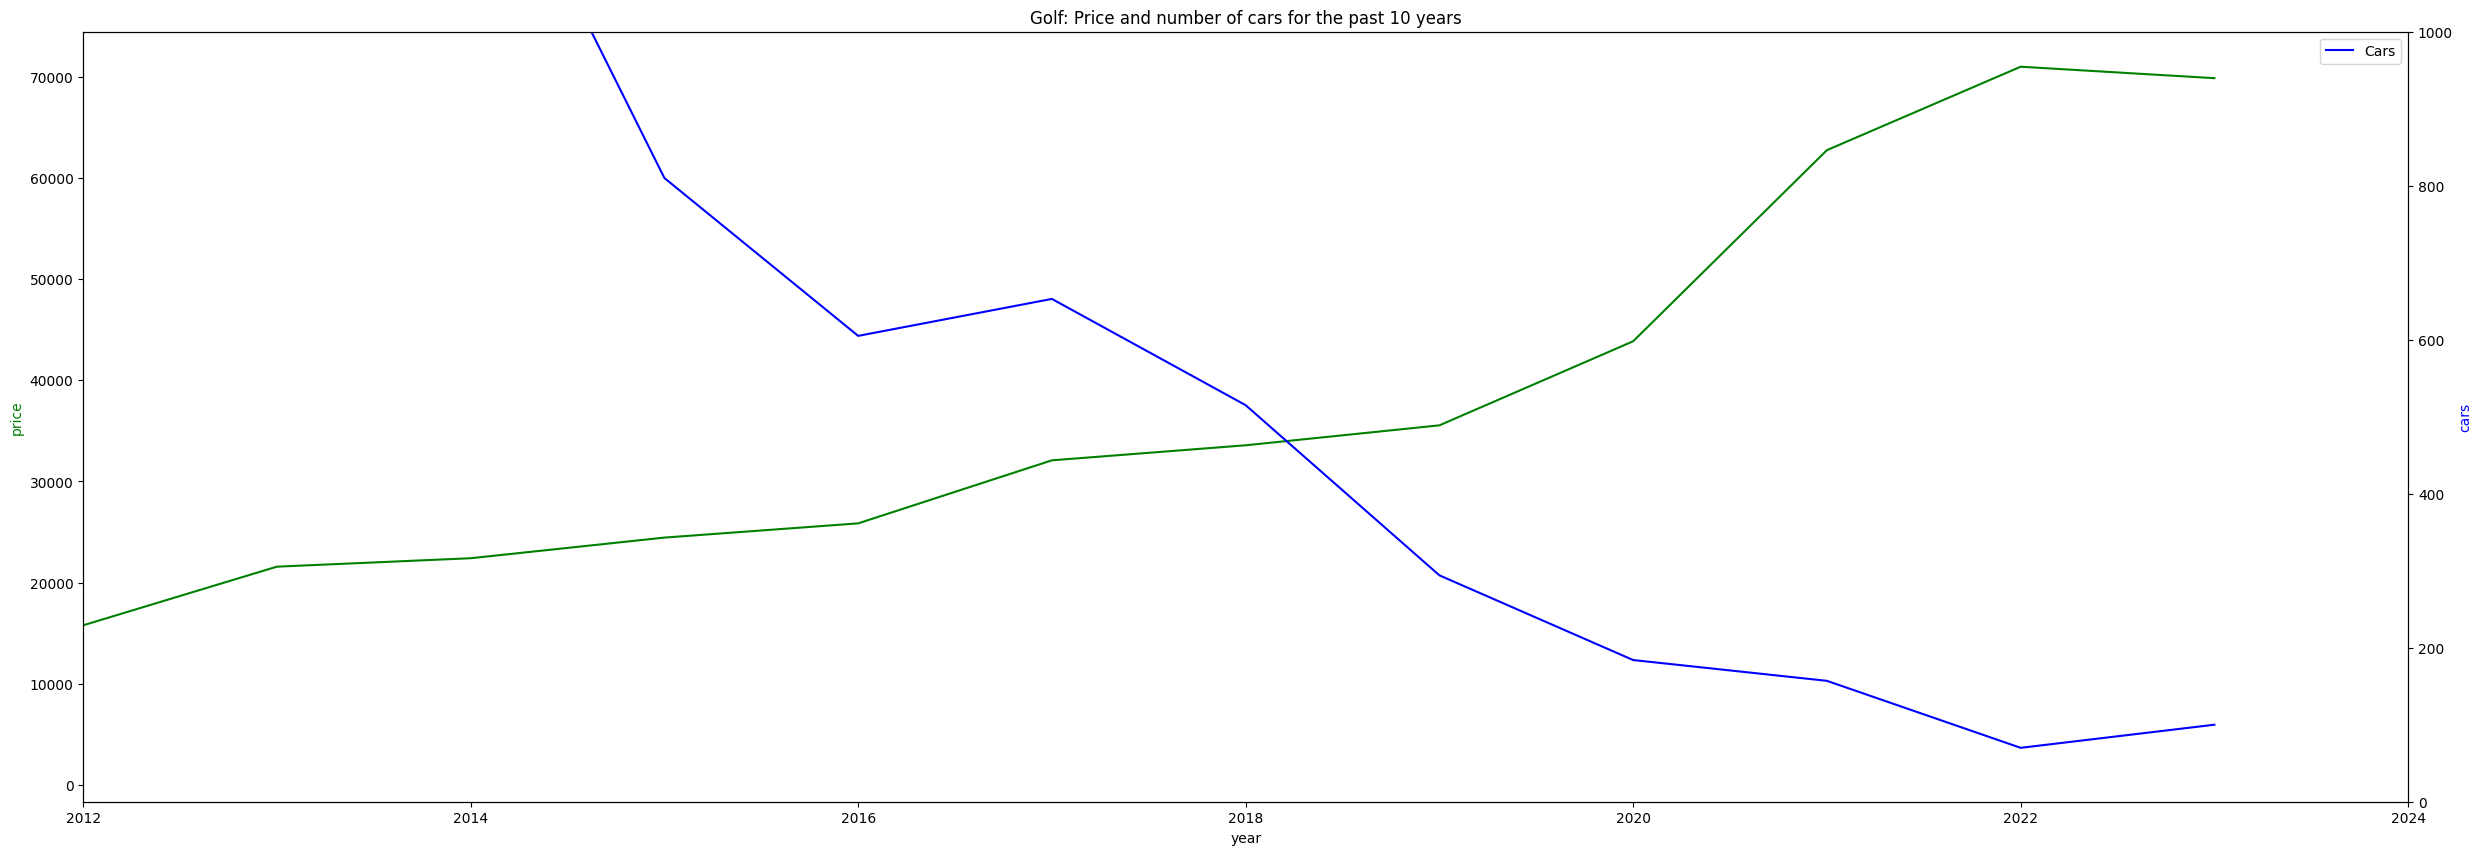

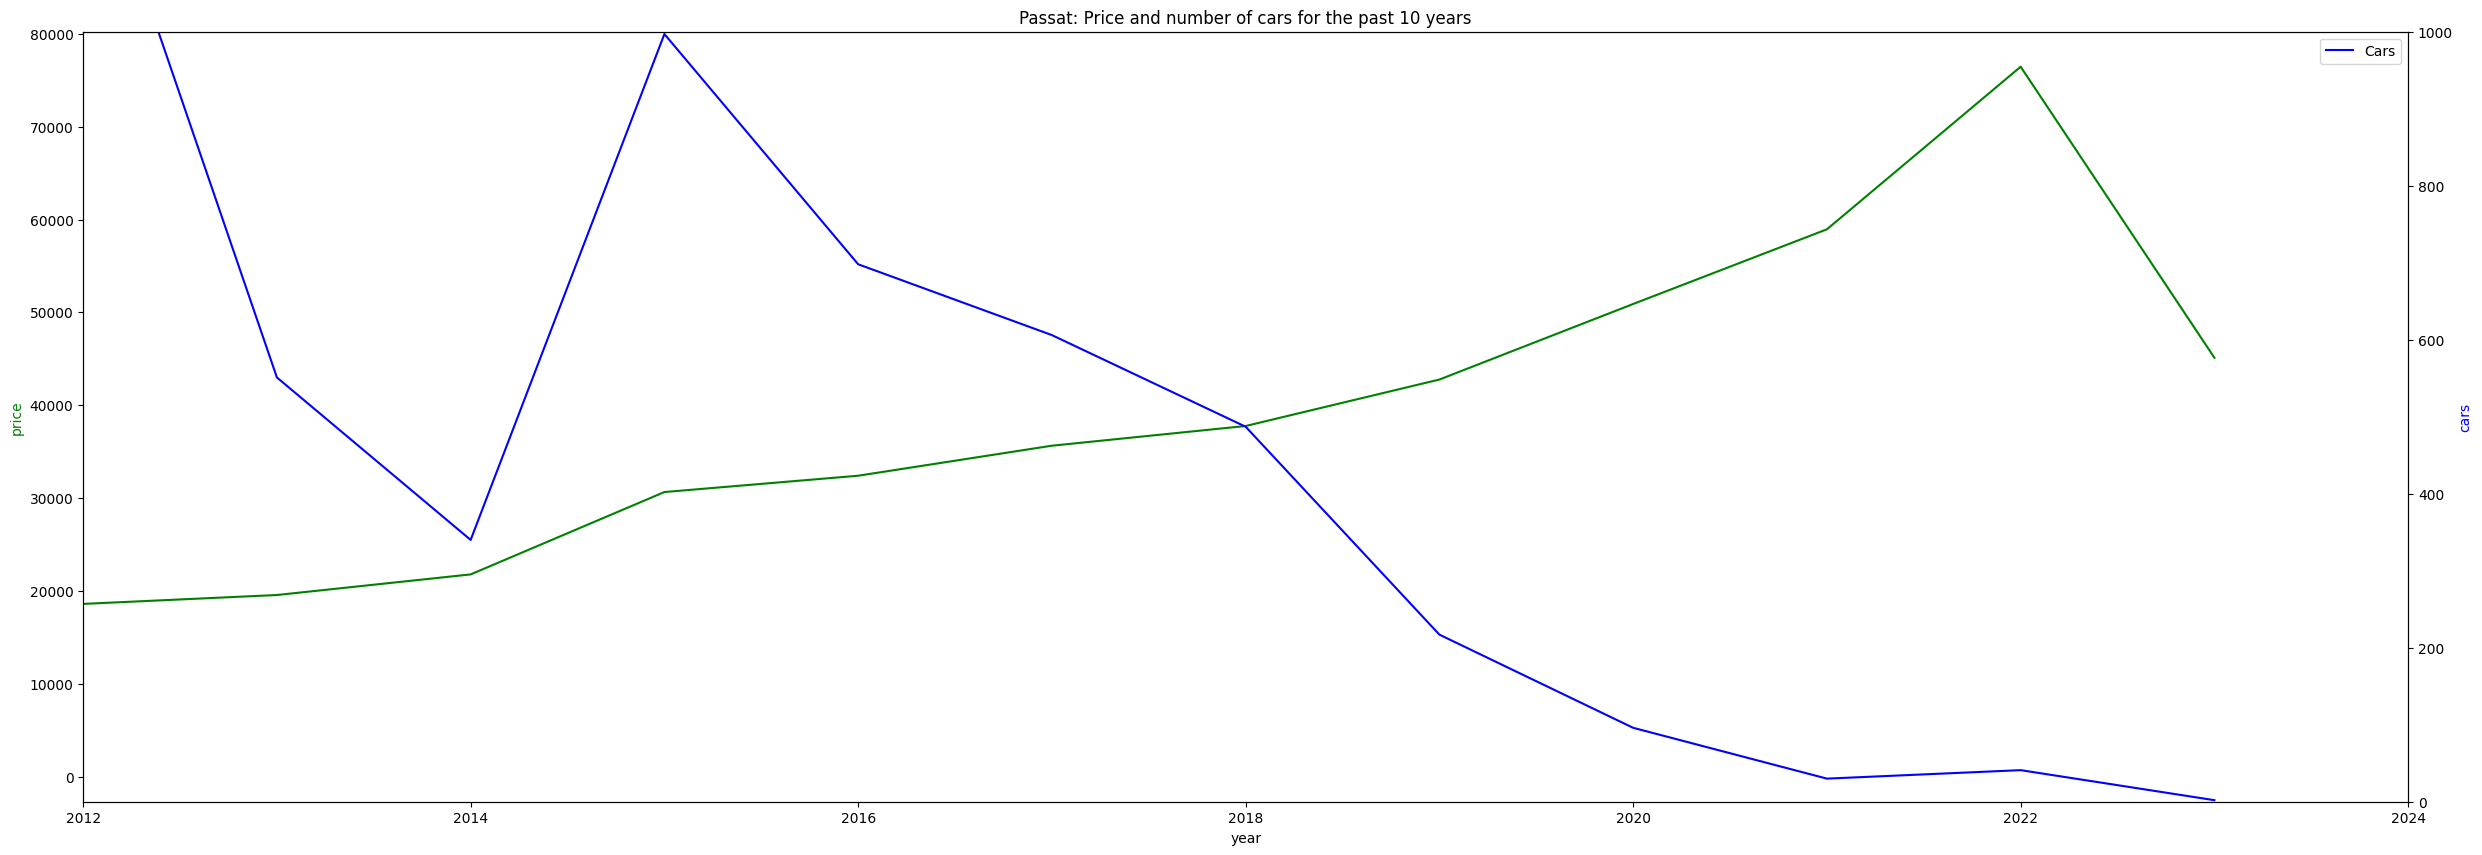

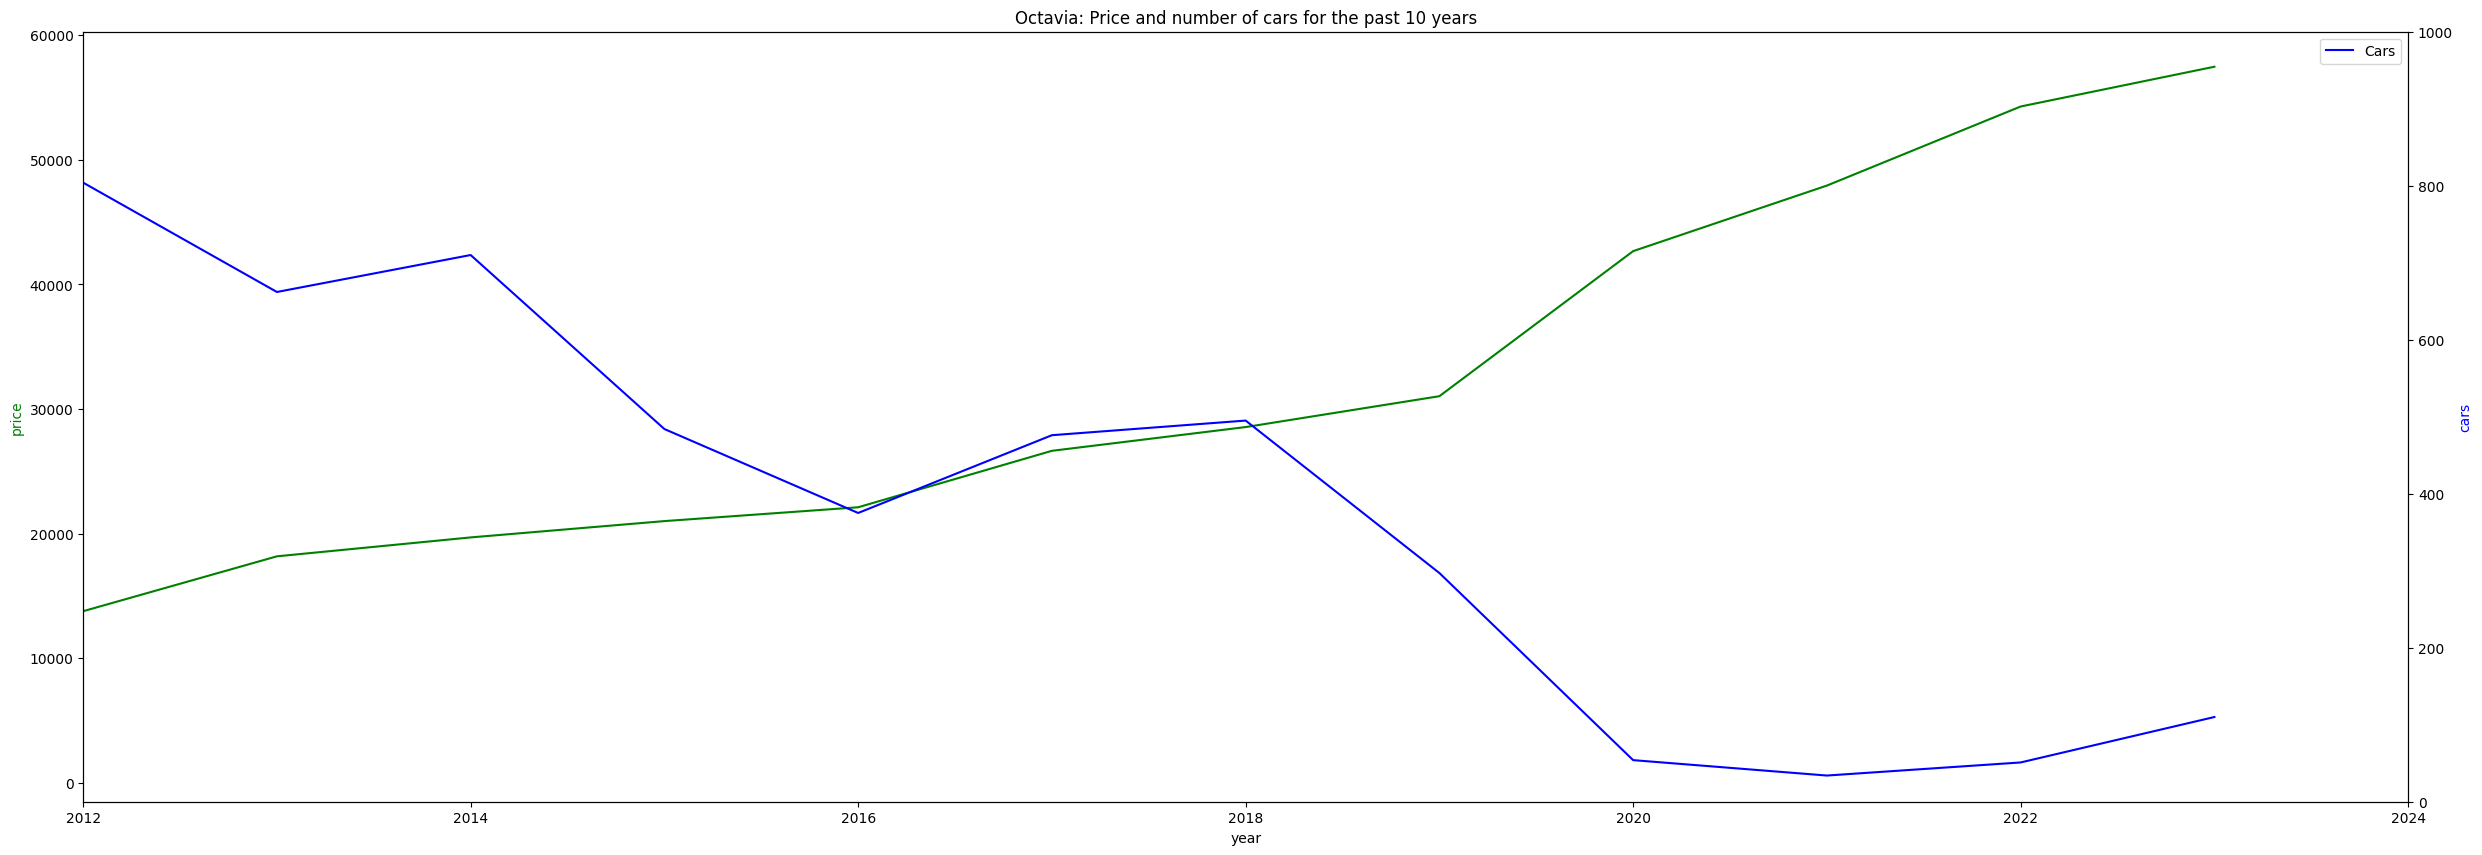

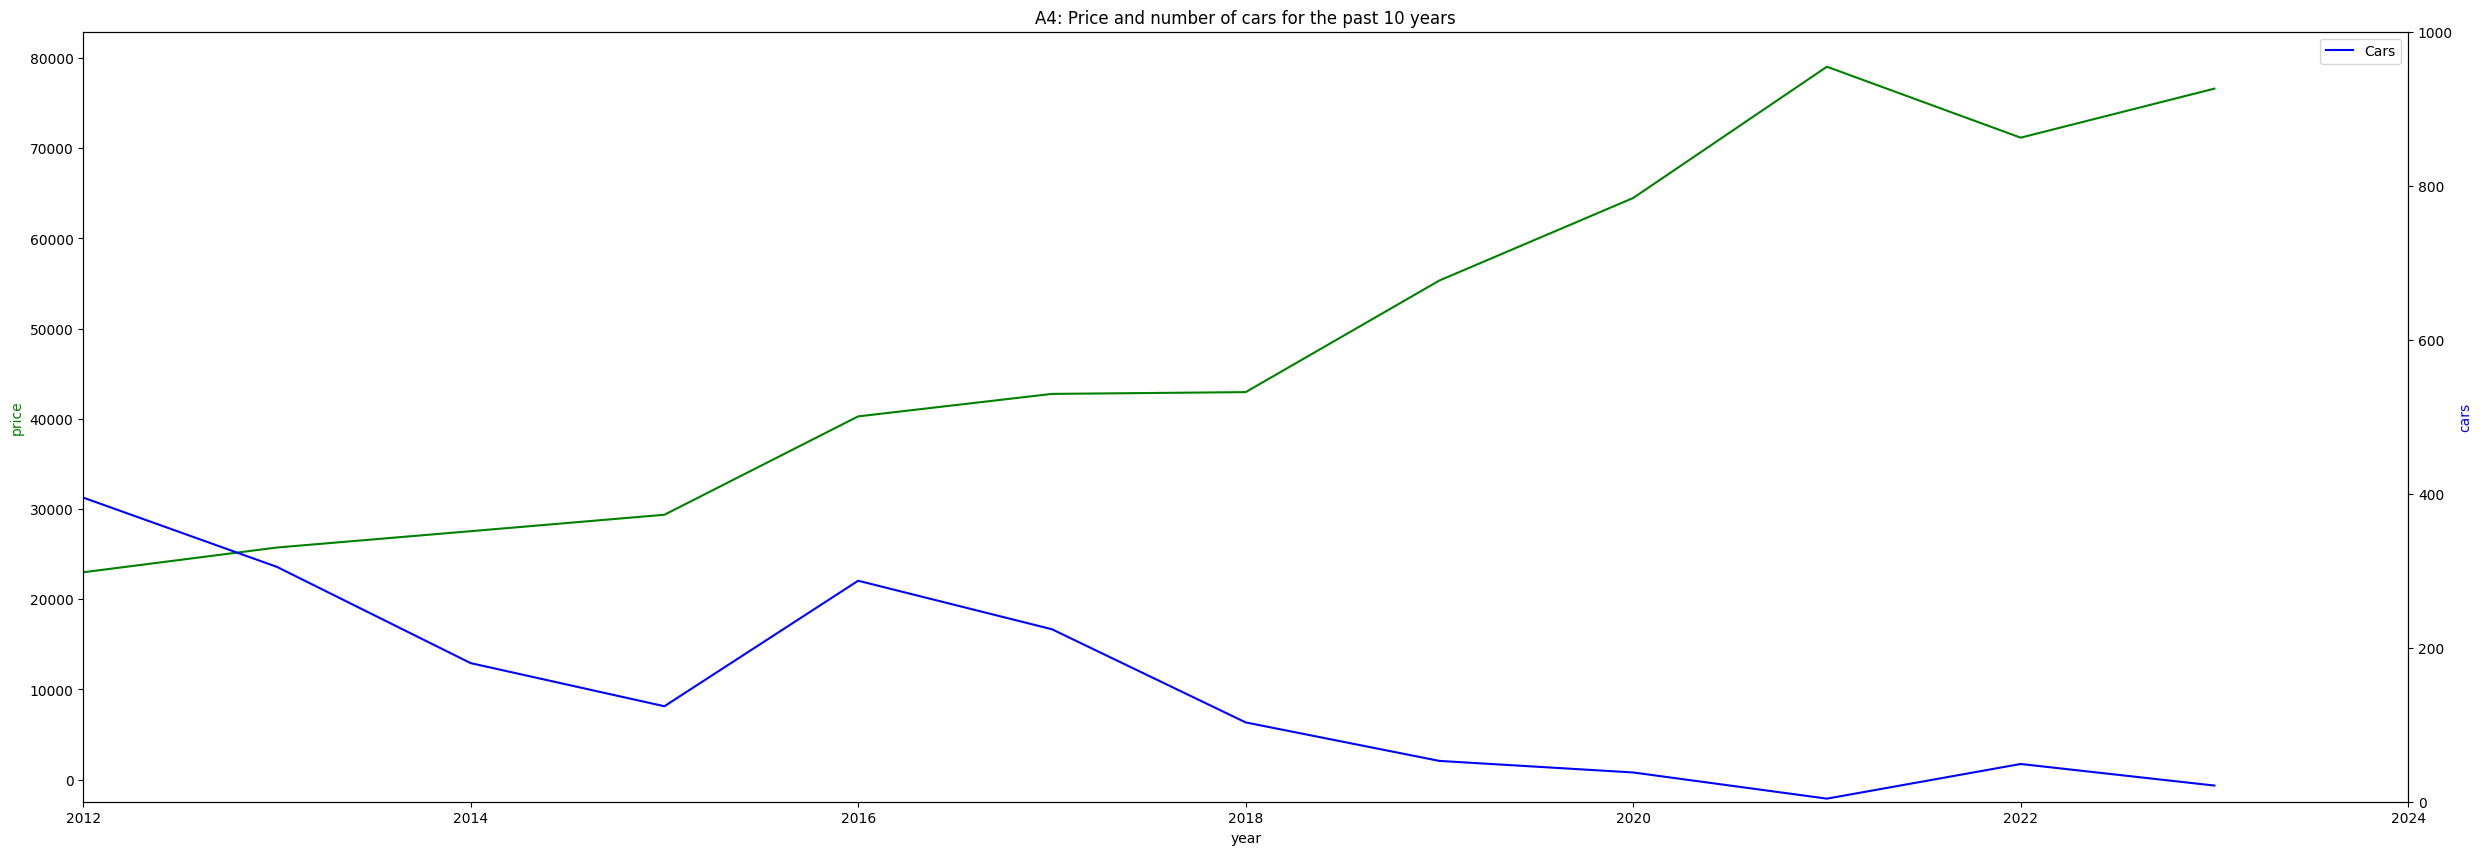

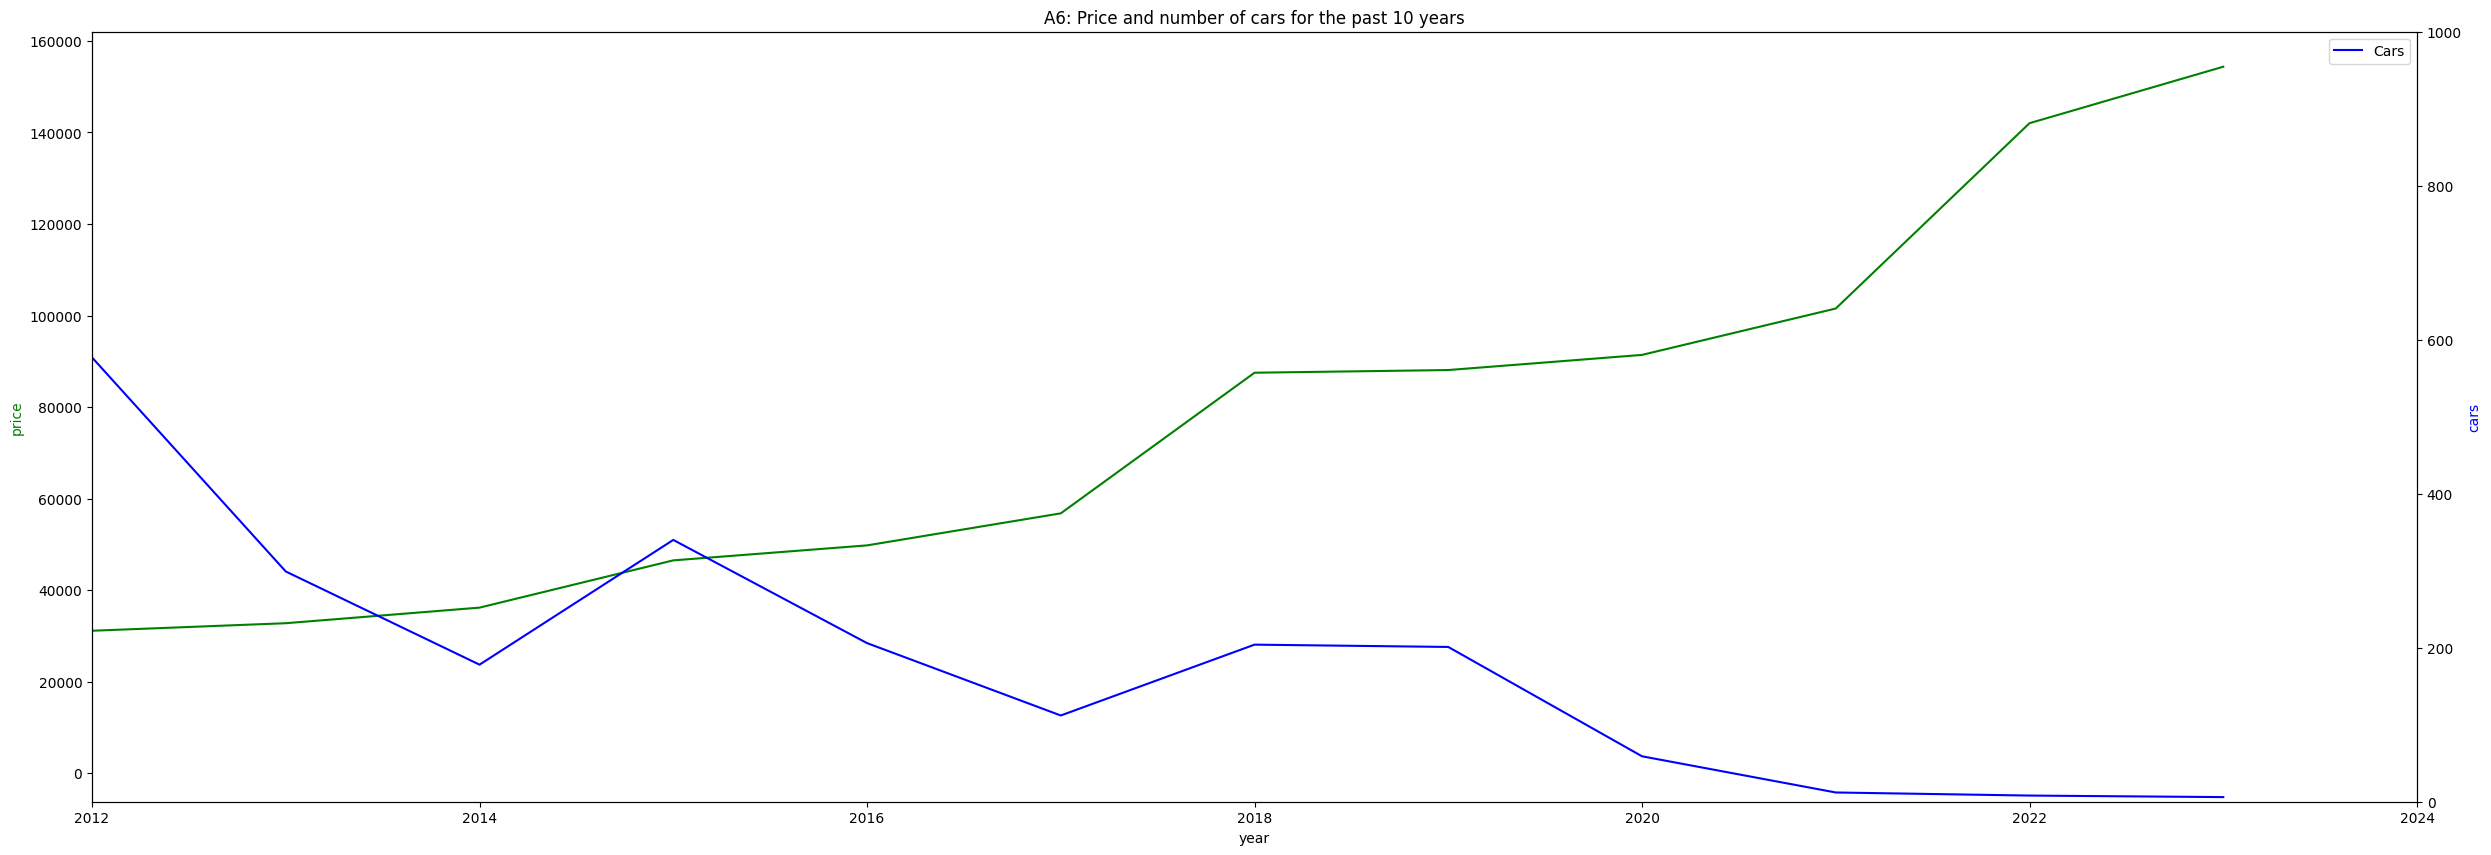

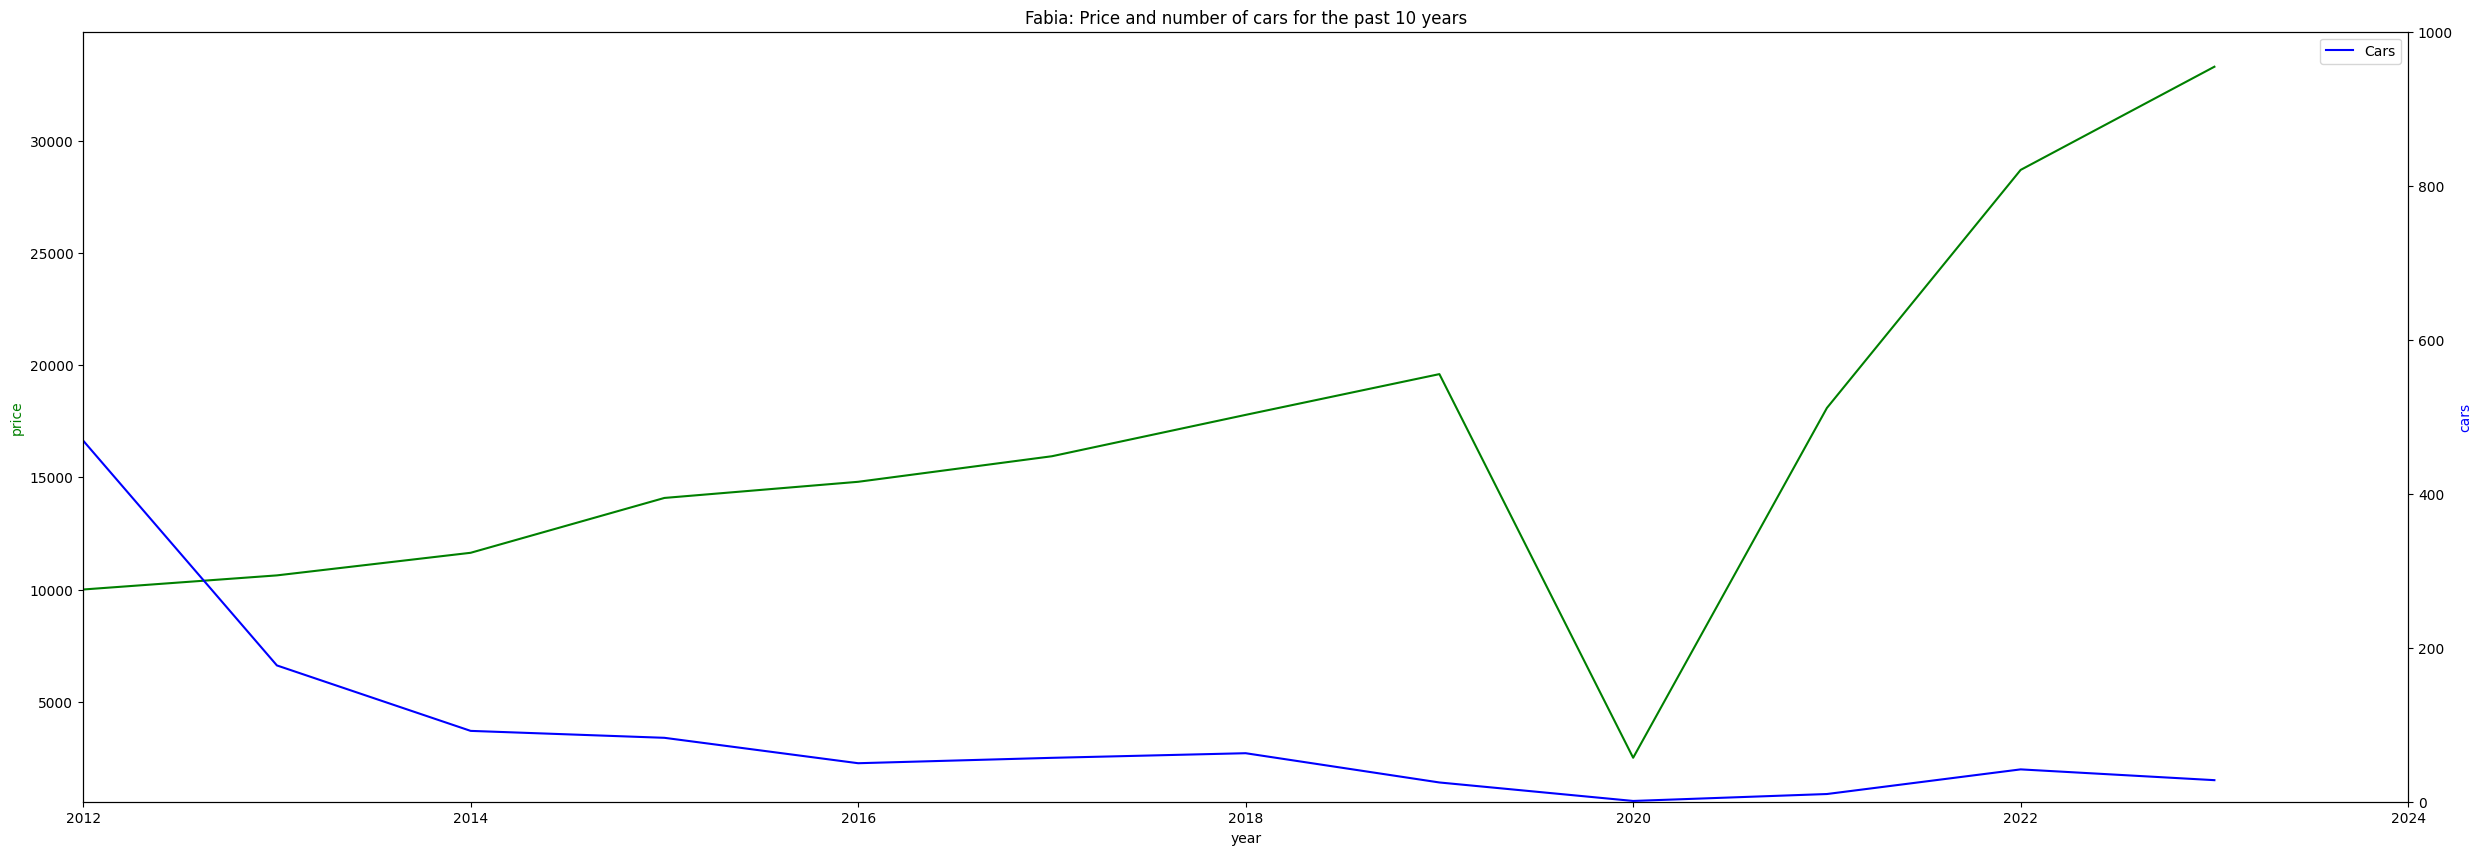

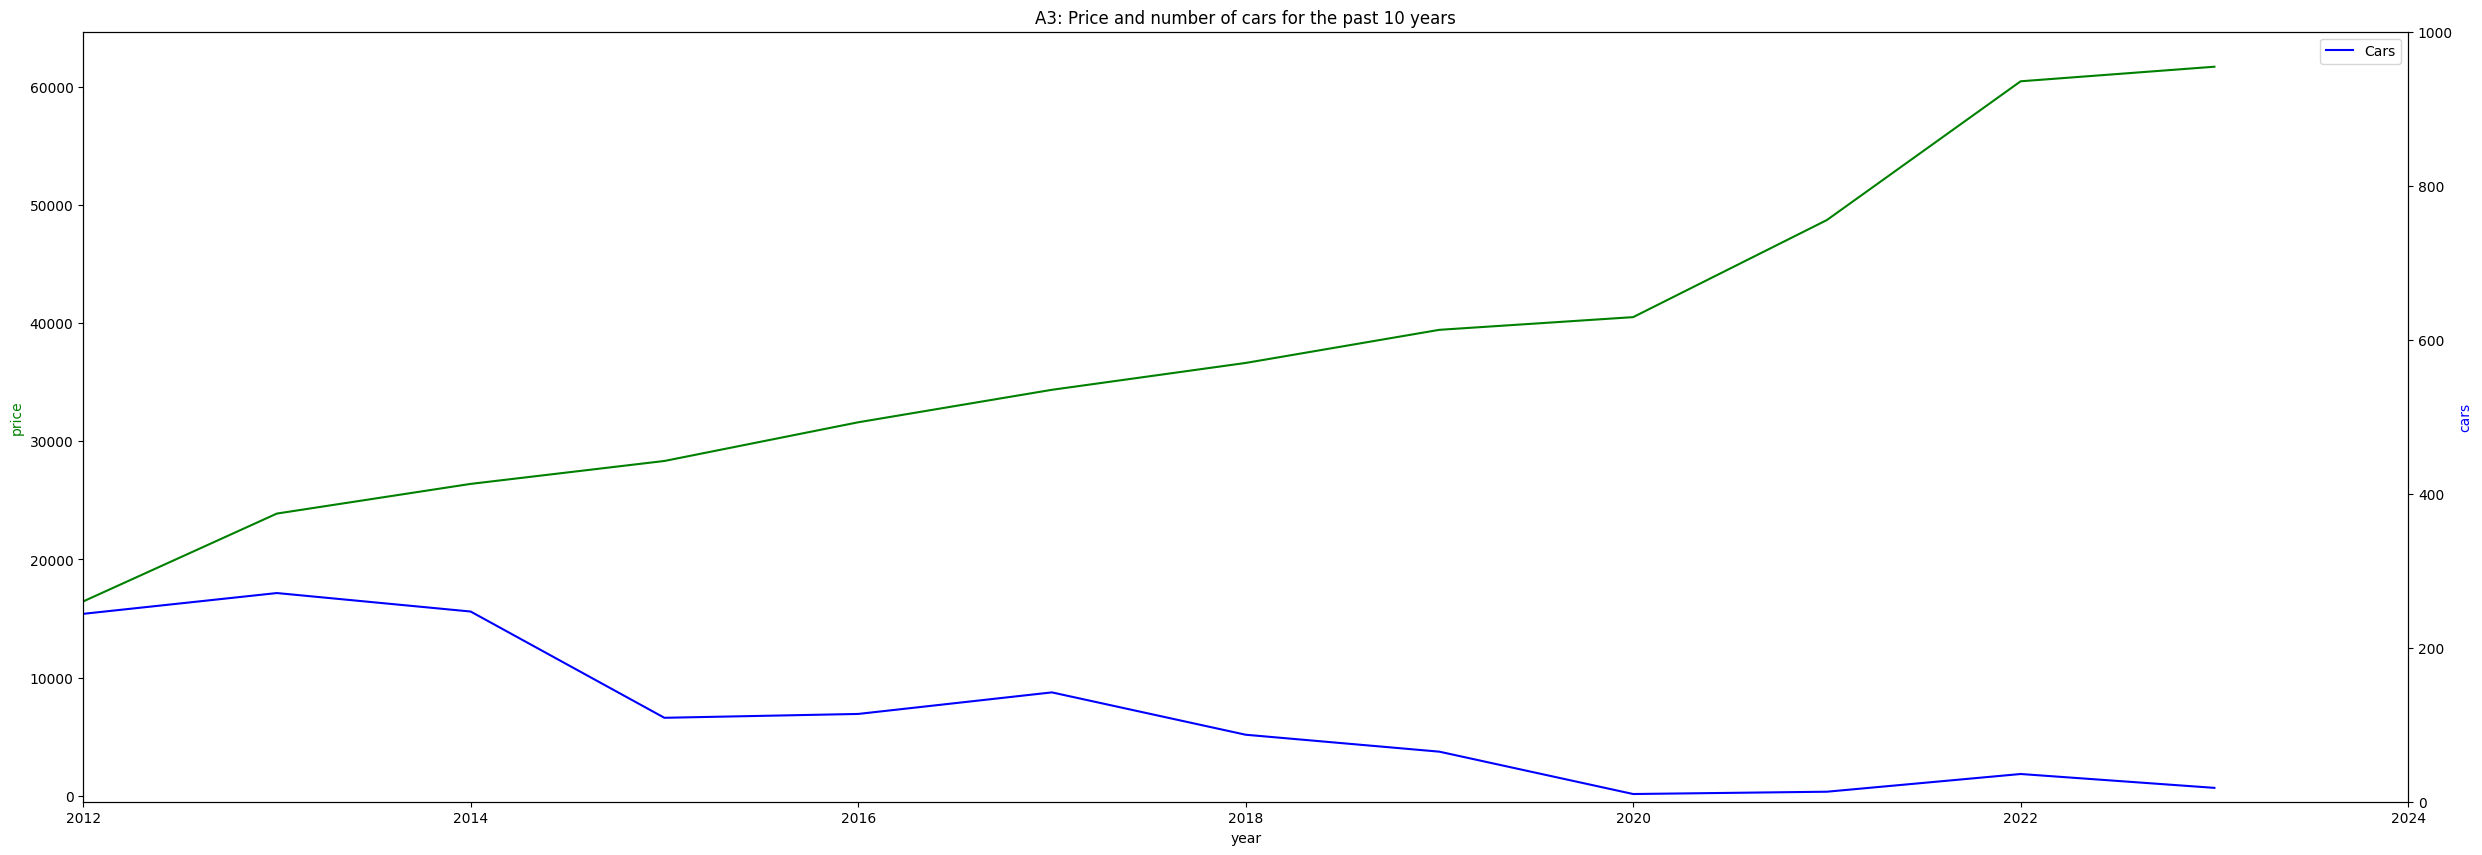

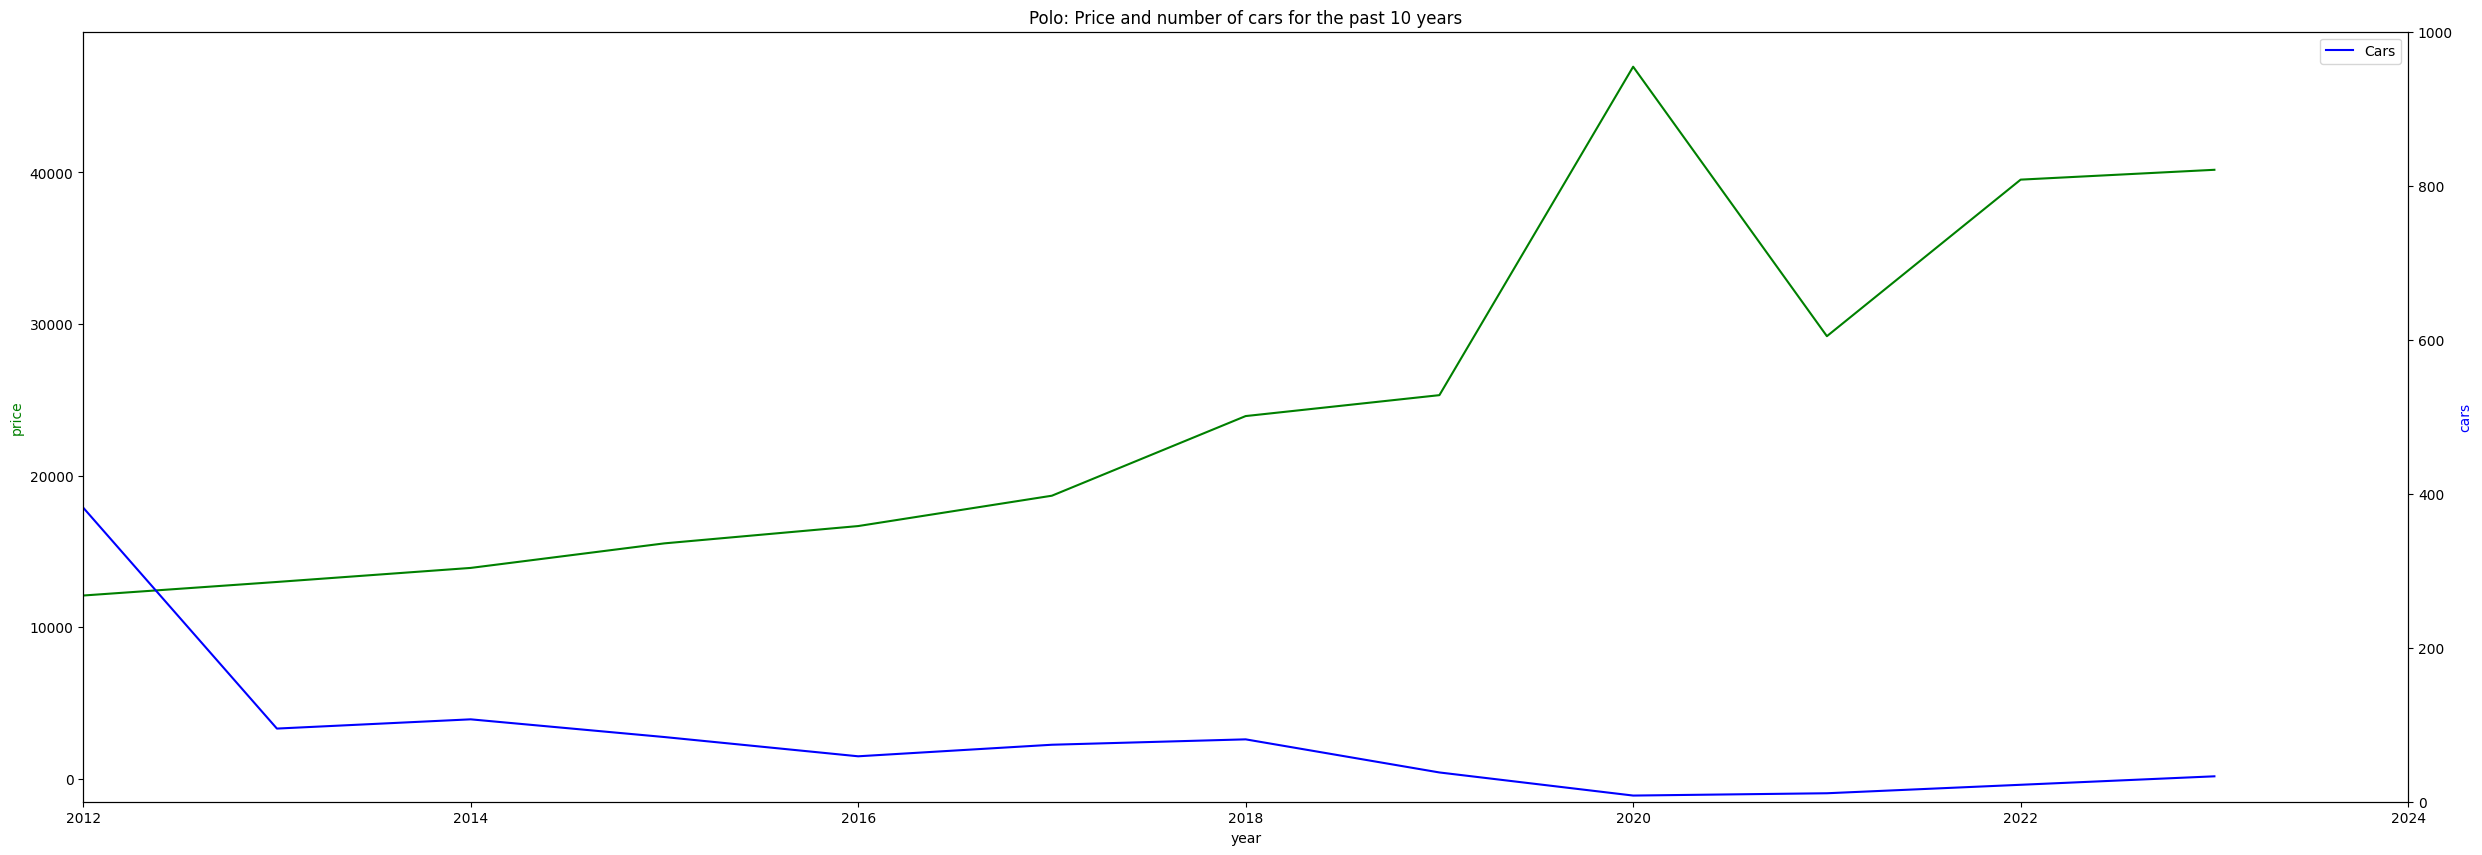

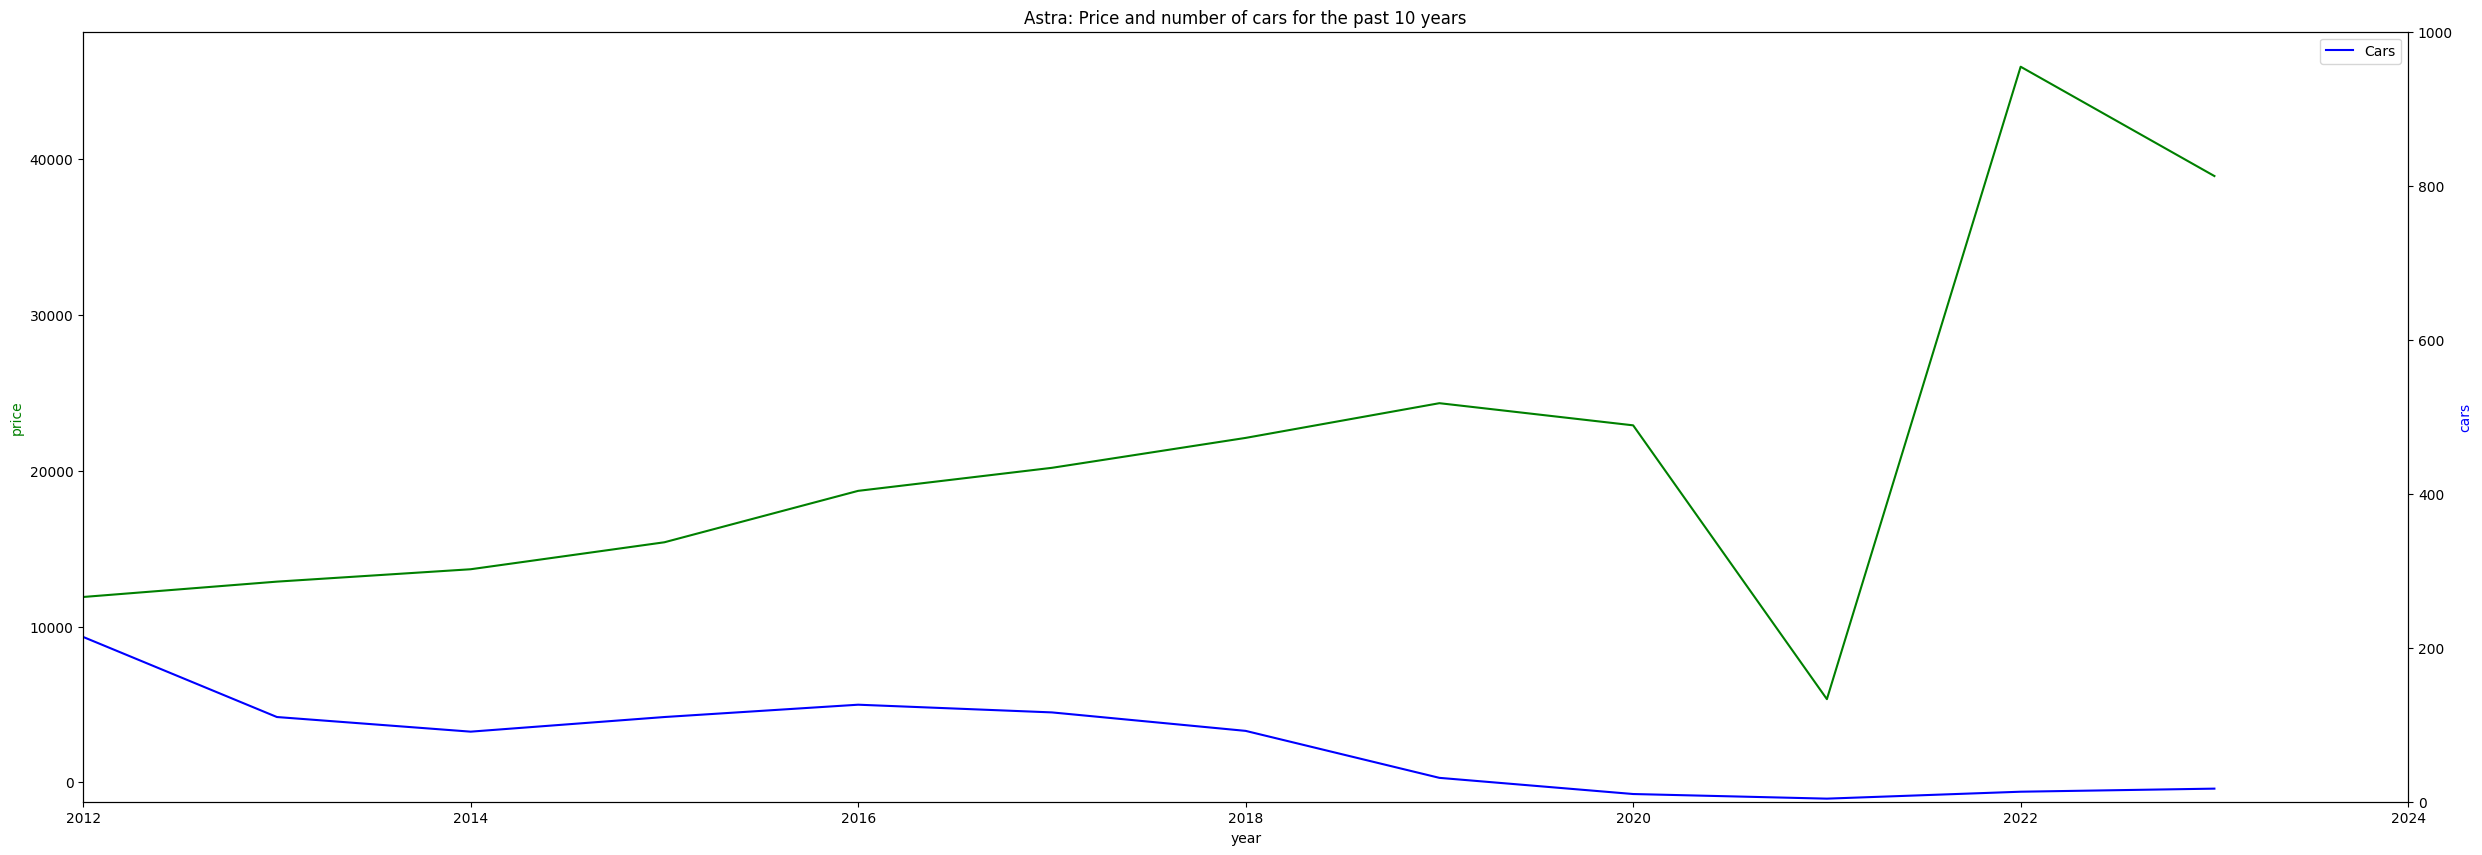

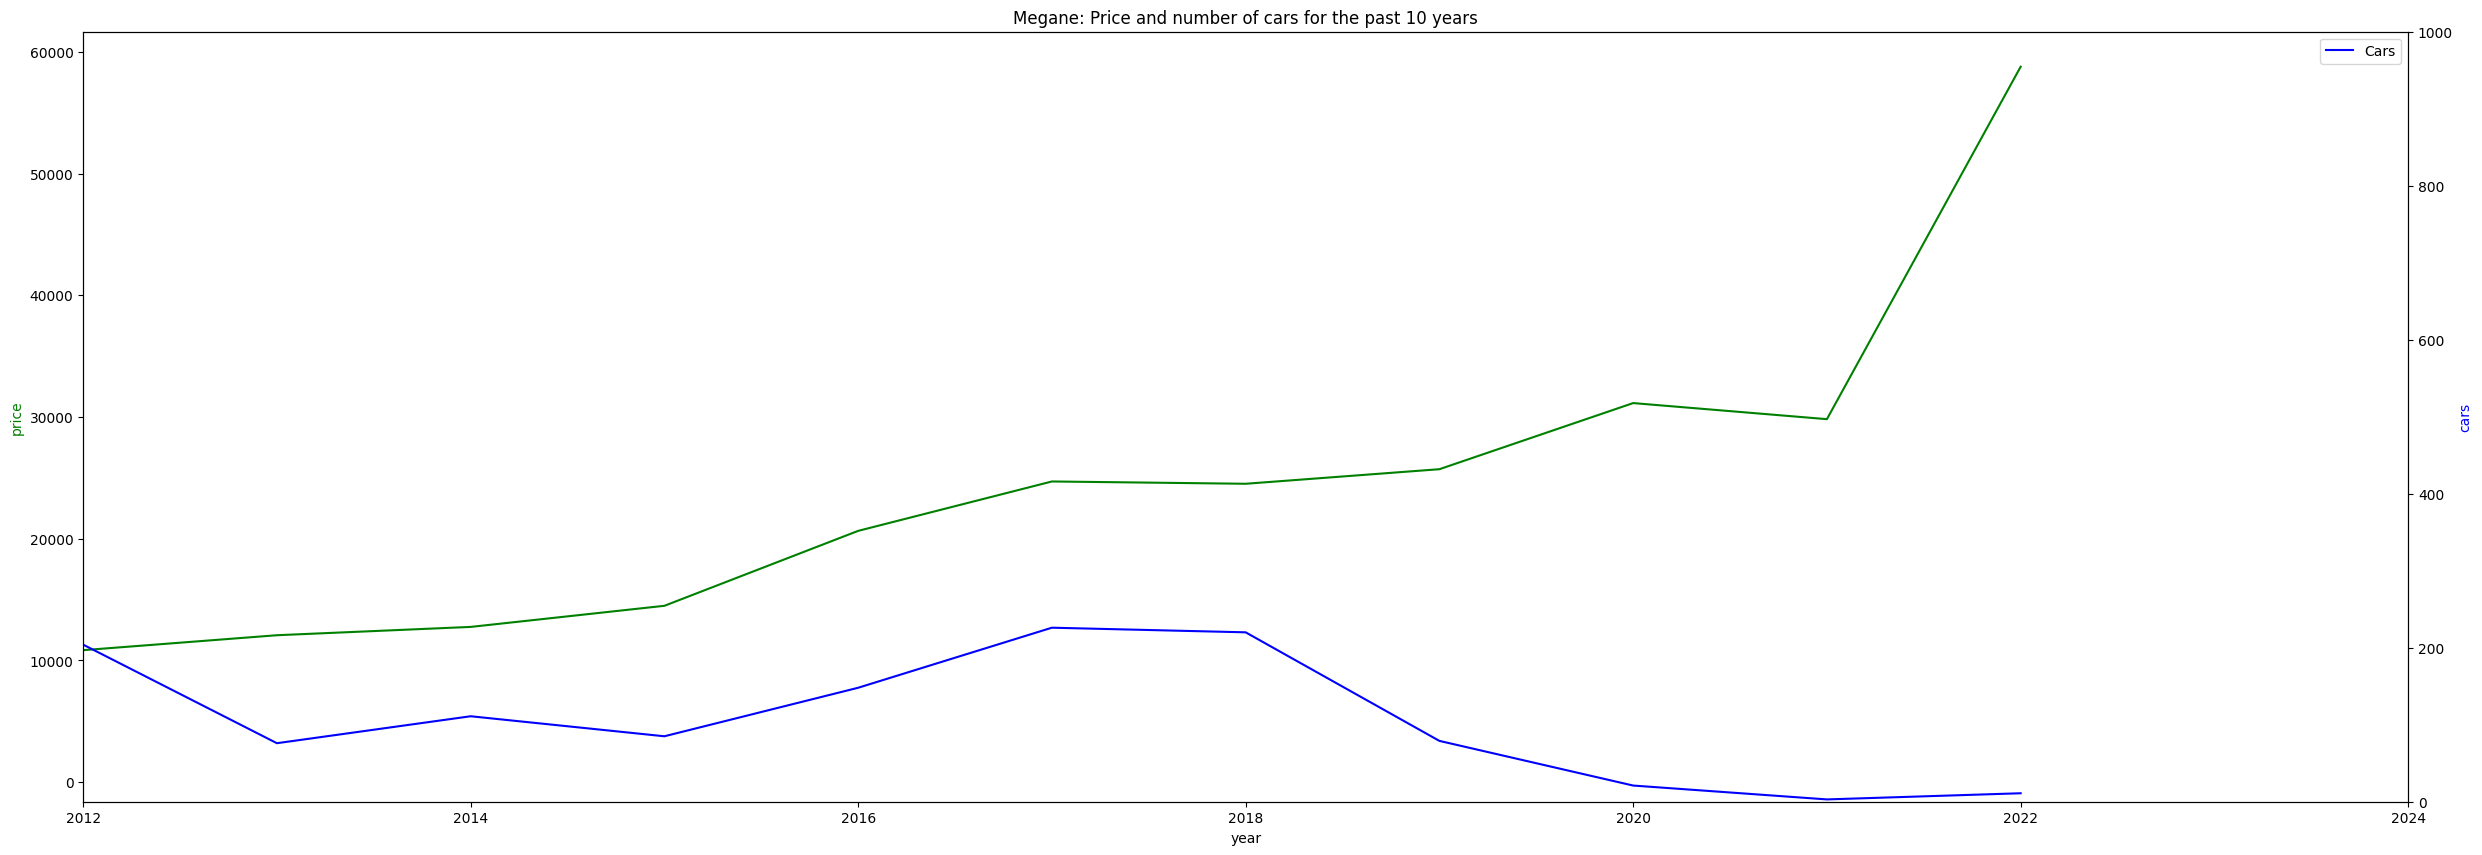

In [137]:
top_models = list(model_count.index[:10])
df2 = df[['model', 'godiste', 'cijena']]
models_price_diff = {}
for model in top_models:
    model_data = df2.loc[df2['model'] == model]
    # print(model, model_data['godiste'].unique())
    year_price = model_data.groupby('godiste')['cijena'].mean()
    year_count = model_data.groupby('godiste')['model'].count()

    models_price_diff[model] = (year_price[2010], year_price[2020])

    fig, ax1 = plt.subplots()
    ax1.set_xlabel('year')
    ax1.set_ylabel('price', color='green')
    ax1.plot(year_price, label='Price', color='green')

    ax2 = ax1.twinx()
    ax2.set_ylabel('cars', color='blue')
    ax2.axis(ymin=0, ymax=1000)
    ax2.plot(year_count, label='Cars', color='blue')

    plt.xlim([2012,2024])
    plt.title(f'{model}: Price and number of cars for the past 10 years')
    plt.legend()


        # plt.plot(year_price, label=model)
        # plt.bar(year_count.index, year_count)
        # plt.legend(title="Model")
        # plt.title(model)
        # plt.xlim([2013,2023])
        # plt.show()

for model in models_price_diff:
  price_2010 = int(models_price_diff[model][0])
  price_2020 = int(models_price_diff[model][1])
  print(f"{model}\t2010 price: {price_2010}\t2020 price: {price_2020}\tPrice lost: {(price_2020-price_2010)/price_2020*100:.0f}%")


<a name="avg_price_over_time"></a>
# 11 Avg price over time
[Back to table of contents](#table_content)

Every data point represents the avg price of all cars listed on that day (on avg about 500-600 cars).
Average price seems to be relatively stable in the last ~ 6 months.

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

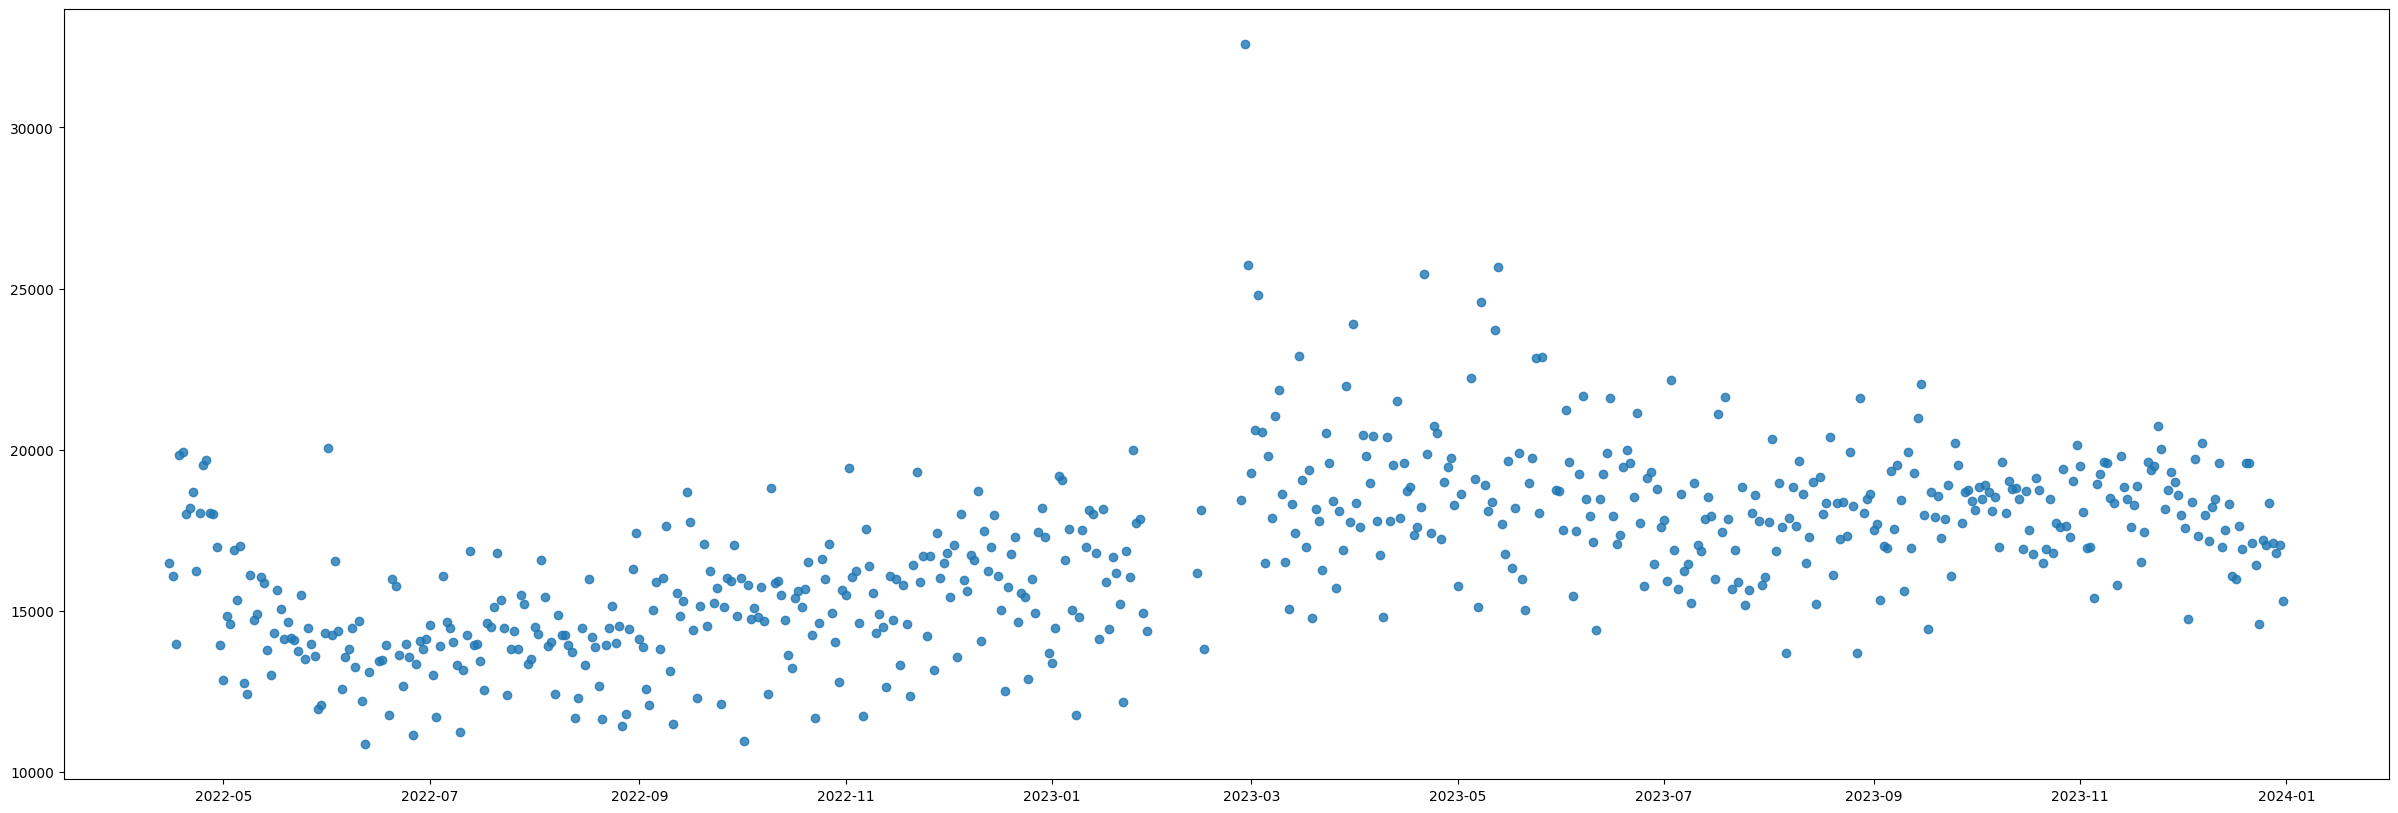

In [140]:
price_over_time = df.groupby('datum')['cijena'].mean()

sns.regplot(x=price_over_time.index, y=price_over_time.values).set(
    title="Avg price of cars listed from 15.04.2022. until 31.12.2023.",
    ylabel='Price',
    xlabel='Days since 14.04.2022.',
    ylim=(0,25000)
)

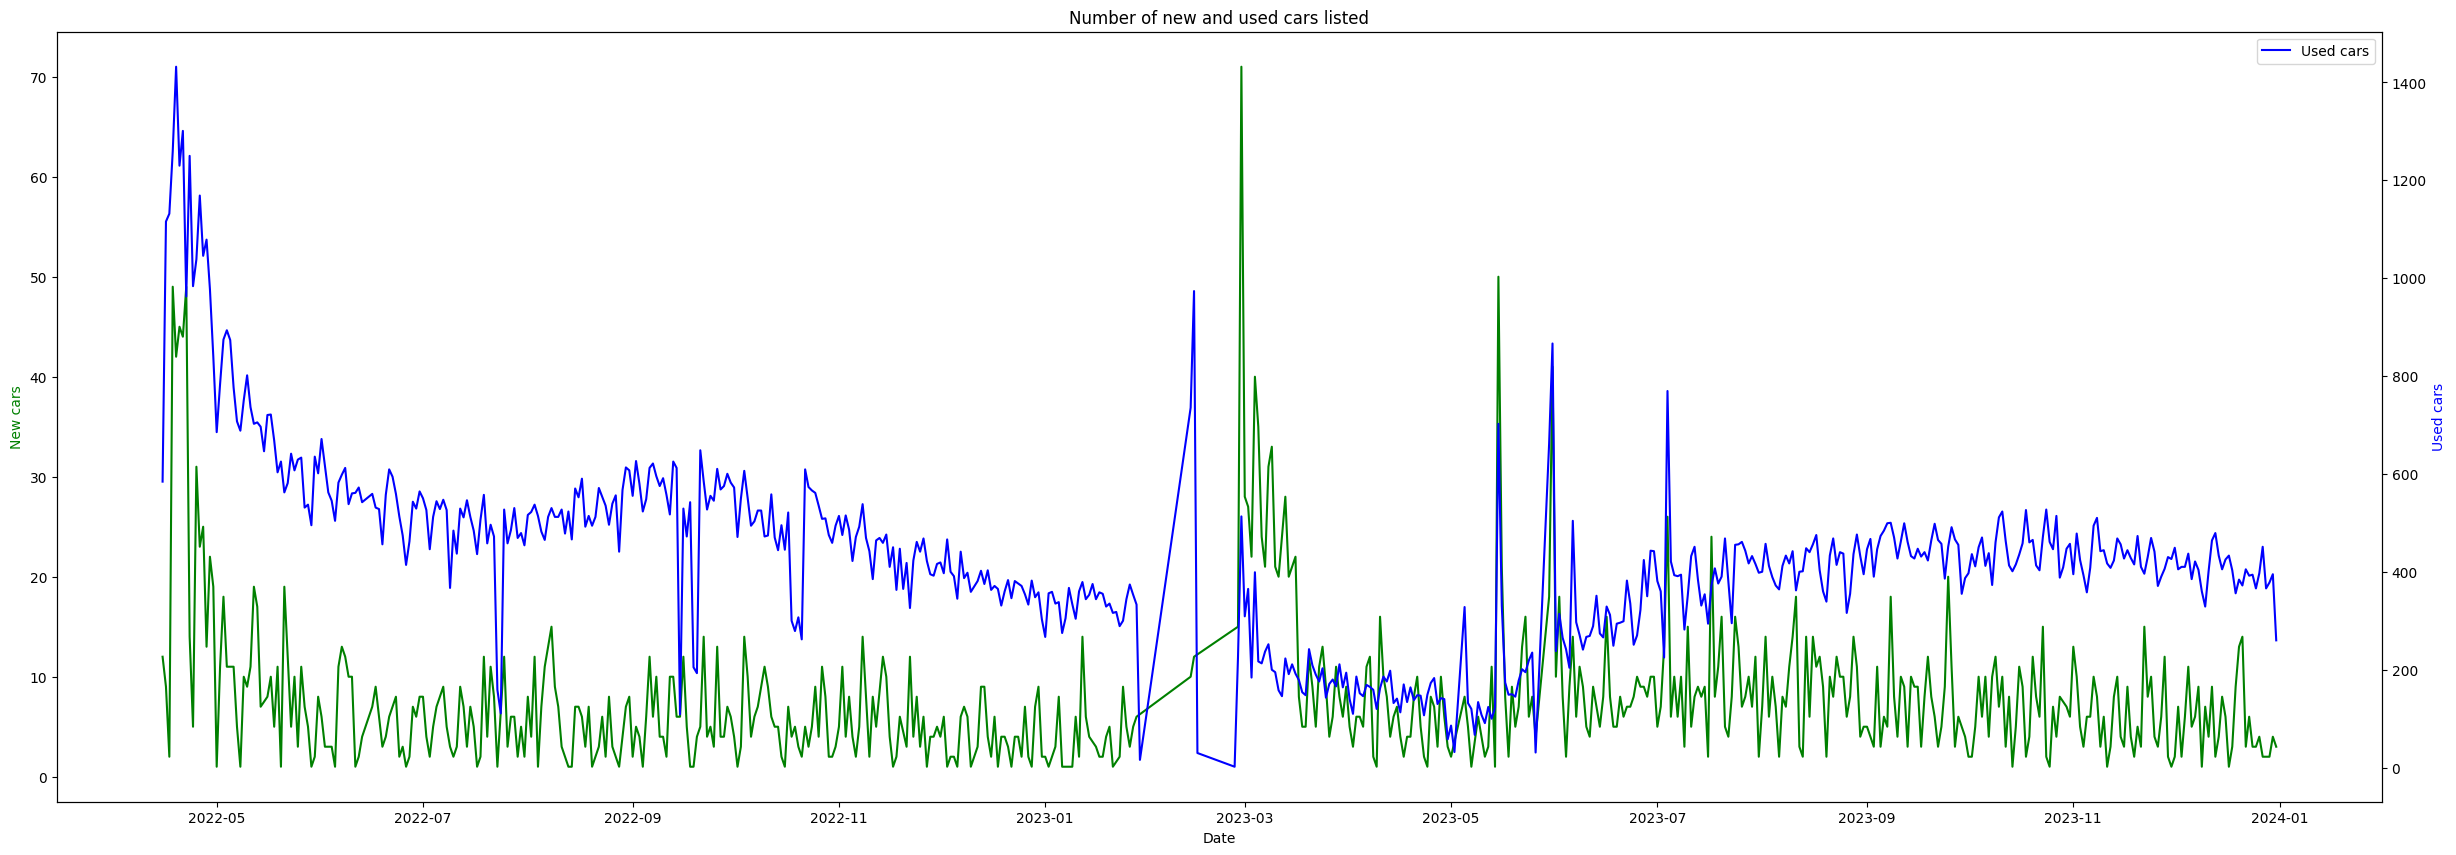

In [147]:
new_cars = df.loc[df['stanje'] == 'novo', ['ime', 'datum']]
used_cars = df.loc[df['stanje'] == 'koristeno', ['ime', 'datum']]

new_cars_number = new_cars.groupby('datum').count()
used_cars_number = used_cars.groupby('datum').count()

fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('New cars', color='green')
ax1.plot(new_cars_number, label='New cars', color='green')

ax2 = ax1.twinx()
ax2.set_ylabel('Used cars', color='blue')
ax2.plot(used_cars_number, label='Used cars', color='blue')

plt.title('Number of new and used cars listed')
plt.legend()
